# Setup

In [1]:
import pandas as pd

In [2]:
# Define the mapping from wait descriptions to numerical values
wait_mapping = {
    'Around 1 hour': 1,
    'Over 1 hour': 2,
    'Over 2 hours': 3,
    'Over 3 hours': 4,
    'Over 4 hours': 5,
    'Over 5 hours': 6,
    'Over 6 hours': 7,
    'Over 7 hours': 8,
    'Over 8 hours': 9
}

In [3]:
# Load the data
df = pd.read_csv('../data/raw_data.csv', parse_dates=['Timestamp'], index_col=['Timestamp'])

In [4]:
# Convert wait times using the mapping
for column in df.columns:  # Skip the first column (Timestamp)
    df[column] = df[column].map(wait_mapping)

In [19]:
df['day_of_week'] = df.index.dayofweek
df['hour_of_day'] = df.index.hour

In [20]:
df.index

DatetimeIndex(['2023-12-31 23:45:00', '2024-01-01 00:01:00',
               '2024-01-01 00:15:00', '2024-01-01 00:30:00',
               '2024-01-01 00:45:00', '2024-01-01 01:00:00',
               '2024-01-01 01:15:00', '2024-01-01 01:30:00',
               '2024-01-01 01:45:00', '2024-01-01 02:00:00',
               ...
               '2024-07-20 21:15:00', '2024-07-20 21:30:00',
               '2024-07-20 21:45:00', '2024-07-20 22:00:00',
               '2024-07-20 22:15:00', '2024-07-20 22:30:00',
               '2024-07-20 22:45:00', '2024-07-20 23:00:00',
               '2024-07-20 23:15:00', '2024-07-20 23:30:00'],
              dtype='datetime64[ns]', name='Timestamp', length=19362, freq=None)

In [21]:
df.head()

,Alice Ho Miu Ling Nethersole Hospital,Caritas Medical Centre,Kwong Wah Hospital,North District Hospital,North Lantau Hospital,Princess Margaret Hospital,Pok Oi Hospital,Prince of Wales Hospital,Pamela Youde Nethersole Eastern Hospital,Queen Elizabeth Hospital,Queen Mary Hospital,Ruttonjee Hospital,St John Hospital,Tseung Kwan O Hospital,Tuen Mun Hospital,Tin Shui Wai Hospital,United Christian Hospital,Yan Chai Hospital,day_of_week,hour_of_day
Timestamp,,,,,,,,,,,,,,,,,,,,
2023-12-31 23:45:00,4,4,9,9,5,9,6,5,5,3,6,4,1,6,9,4,8,7,6,23
2024-01-01 00:01:00,4,5,9,9,5,9,6,6,5,3,6,5,1,6,9,4,8,7,0,0
2024-01-01 00:15:00,4,5,9,9,5,9,6,5,5,2,6,5,1,6,9,4,8,7,0,0
2024-01-01 00:30:00,4,7,9,9,5,9,6,5,5,3,6,5,1,6,9,4,8,7,0,0
2024-01-01 00:45:00,4,6,9,9,5,9,6,5,5,3,6,5,1,6,9,4,8,7,0,0


# Overall Analysis

In [11]:
import matplotlib.pyplot as plt

In [34]:
# Group by day of the week and hour of the day
daily_means = df.groupby('day_of_week').mean().mean(axis=1)
hourly_means = df.groupby('hour_of_day').mean().mean(axis=1)

# Define a function to plot data
def plot_data(data, title):
    min_val = data.min().min()  # Minimum of the minima across all columns
    max_val = data.max().max()  # Maximum of the maxima across all columns
    buffer = (max_val - min_val) * 0.1  # Adding 10% of the range as buffer
    ax = data.plot(kind='bar', figsize=(10, 6))
    plt.ylim(min_val - buffer, max_val + buffer)
    plt.title(title)
    plt.ylabel('Average Wait Time')
    plt.show()

## Overall Best Day of the Week

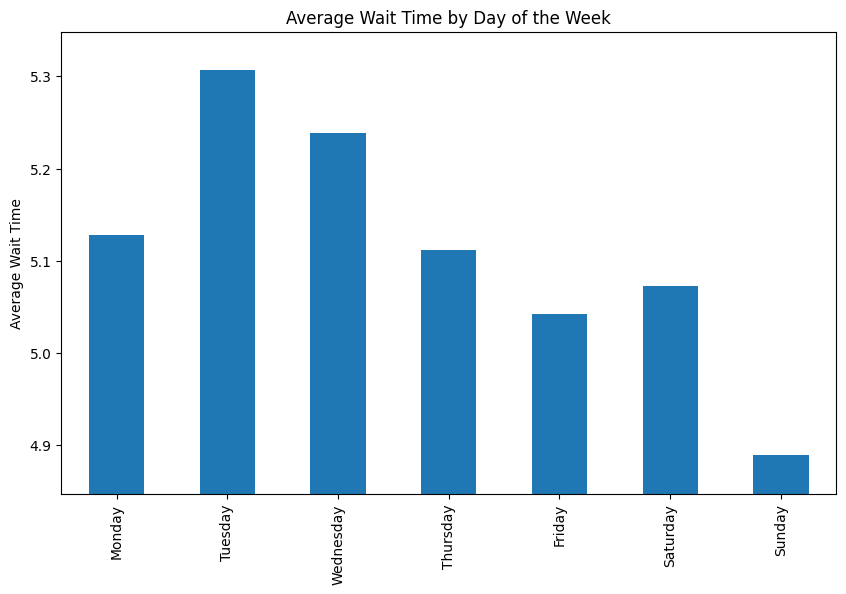

Most busy day: Tuesday
Least busy day: Sunday


In [35]:
# Adjust day labels
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_means.index = day_labels

# Plot overall day and hour averages
plot_data(daily_means, 'Average Wait Time by Day of the Week')

# Print busiest and least busy times
print("Most busy day:", daily_means.idxmax())
print("Least busy day:", daily_means.idxmin())

## Overall Best Hour of the Week

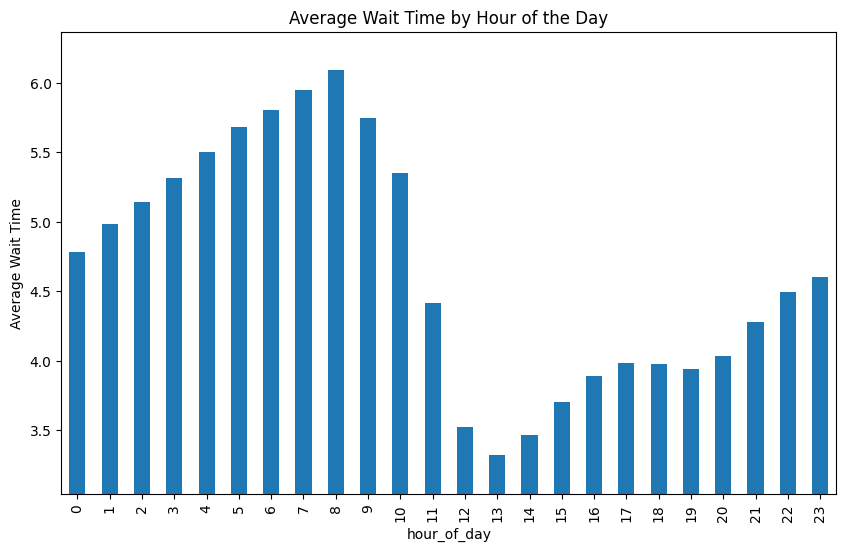

Most busy hour: 8
Least busy hour: 13


In [36]:
# Plot overall day and hour averages
plot_data(hourly_means, 'Average Wait Time by Hour of the Day')

# Print busiest and least busy times
print("Most busy hour:", hourly_means.idxmax())
print("Least busy hour:", hourly_means.idxmin())

# Analysis Per Hospital

In [45]:
# Helper functions
def plot_datax(data, title, ylabel, ax):
    """Plot data on given Axes."""
    min_val = data.min()
    max_val = data.max()
    buffer = (max_val - min_val) * 0.1  # Adding 10% of range as buffer
    data.plot(kind='bar', ax=ax)
    ax.set_ylim([min_val - buffer, max_val + buffer])
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    
def compute_averages(df, group_by, column):
    """Compute average of a column grouped by specified field."""
    return df.groupby(group_by)[column].mean()

def display_side_by_side_plots(df, hospital):
    """Display side-by-side plots for day and hour averages."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    average_per_day = compute_averages(df, 'day_of_week', hospital)
    # Adjust day labels
    average_per_day.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    average_per_hour = compute_averages(df, 'hour_of_day', hospital)

    plot_datax(average_per_day, f'{hospital} - Average by Day', 'Avg Wait Time', ax1)
    plot_datax(average_per_hour, f'{hospital} - Average by Hour', 'Avg Wait Time', ax2)
    plt.show()

def print_statistics(averages, title):
    """Print statistics for most and least busy times."""
    print(f"{title} Stats:")
    print("Most busy:", averages.idxmax())
    print("Least busy:", averages.idxmin())

def plot_daily_hourly_averages(df, hospital):
    """Plot daily hourly averages in a grid layout."""
    fig, axes = plt.subplots(2, 4, figsize=(24, 12))  # Adjust grid size based on your preference
    day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    for day in range(7):
        daily_data = df[df['day_of_week'] == day]
        daily_averages = compute_averages(daily_data, 'hour_of_day', hospital)
        ax = axes[day // 4, day % 4]
        plot_datax(daily_averages, f'Day {day_labels[day]} Hourly Averages', 'Avg Wait Time', ax)
    plt.tight_layout()
    plt.show()

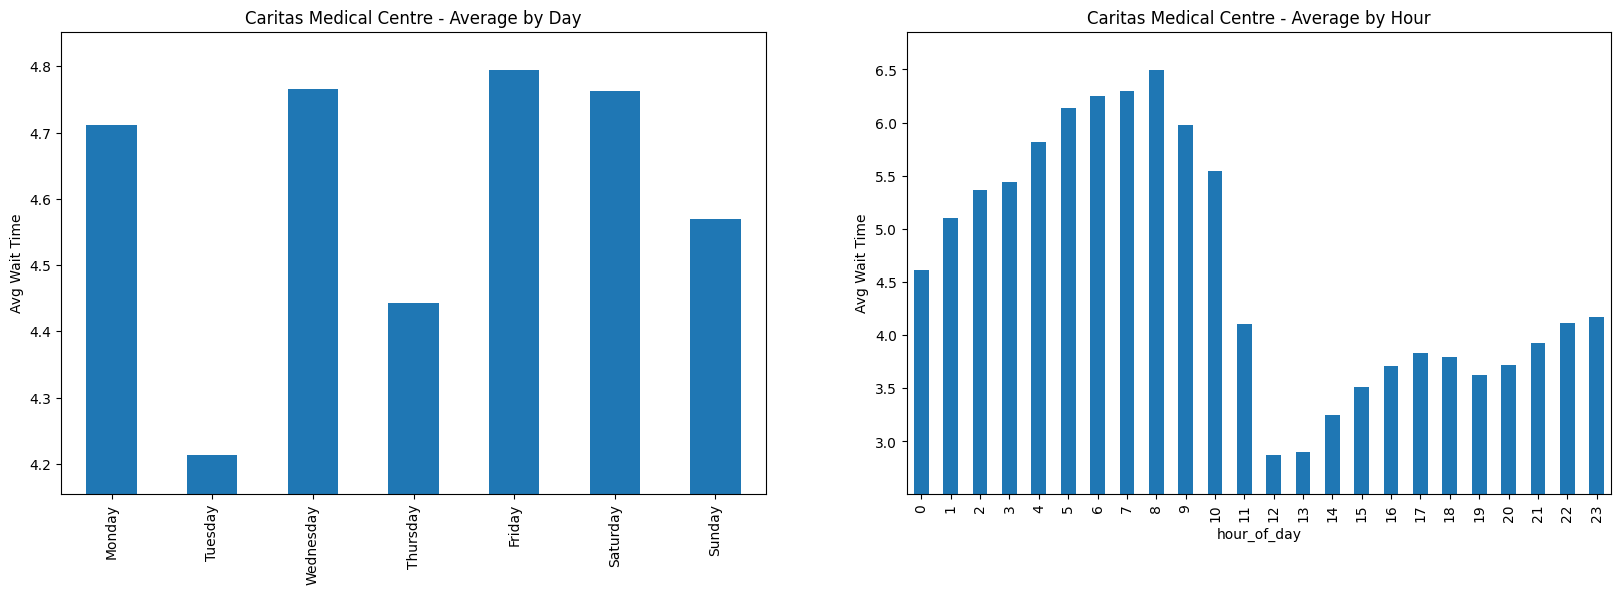

Caritas Medical Centre - Day of Week Stats:
Most busy: Friday
Least busy: Tuesday
Caritas Medical Centre - Hour of Day Stats:
Most busy: 8
Least busy: 12


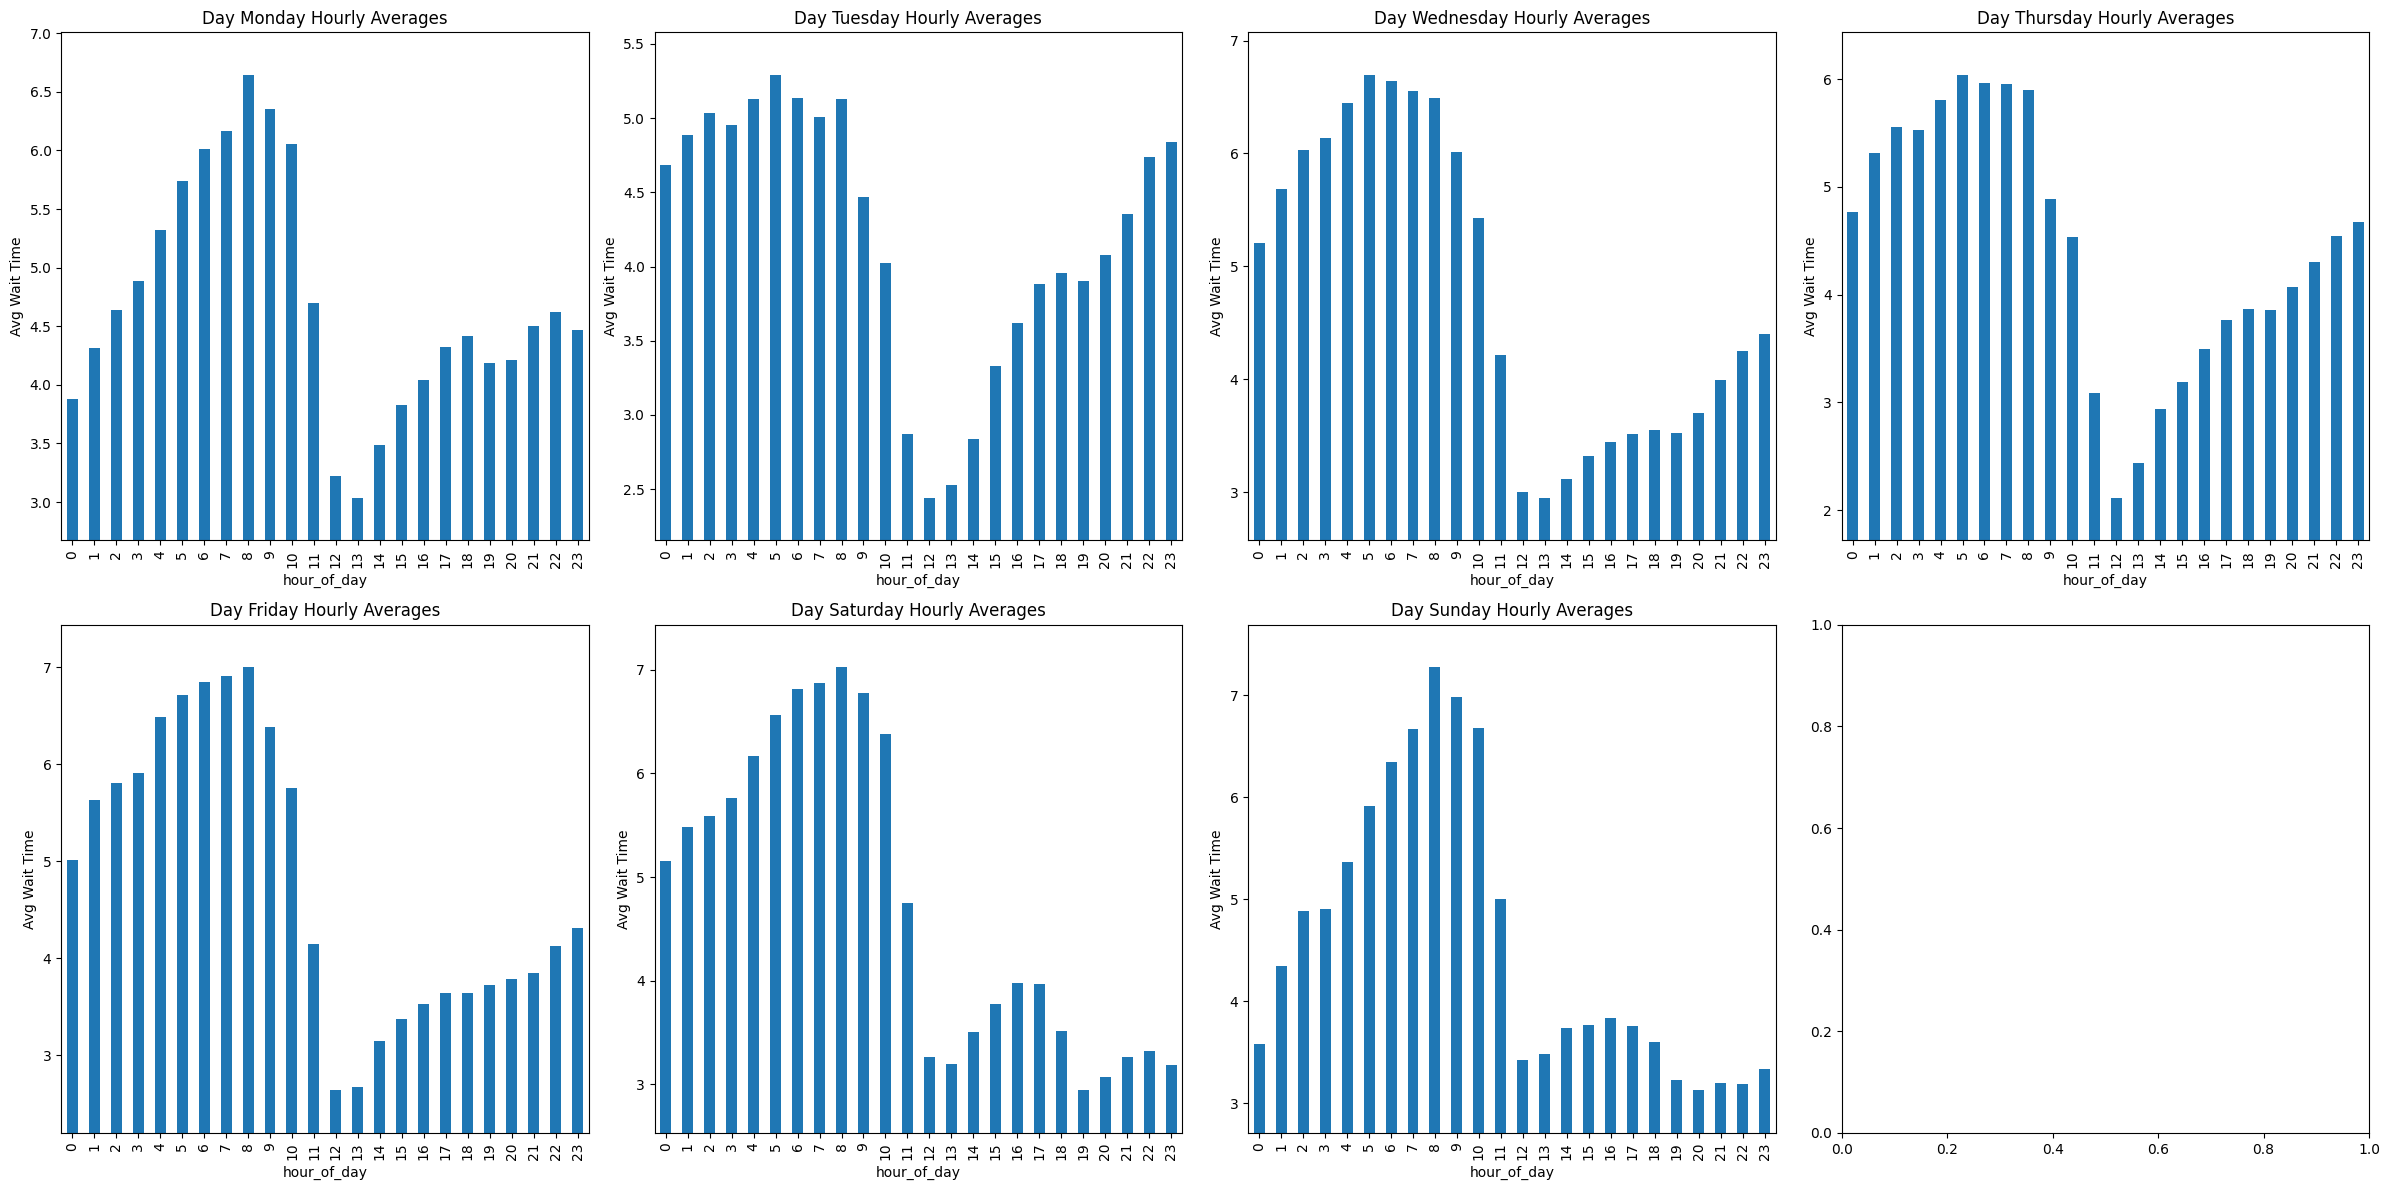

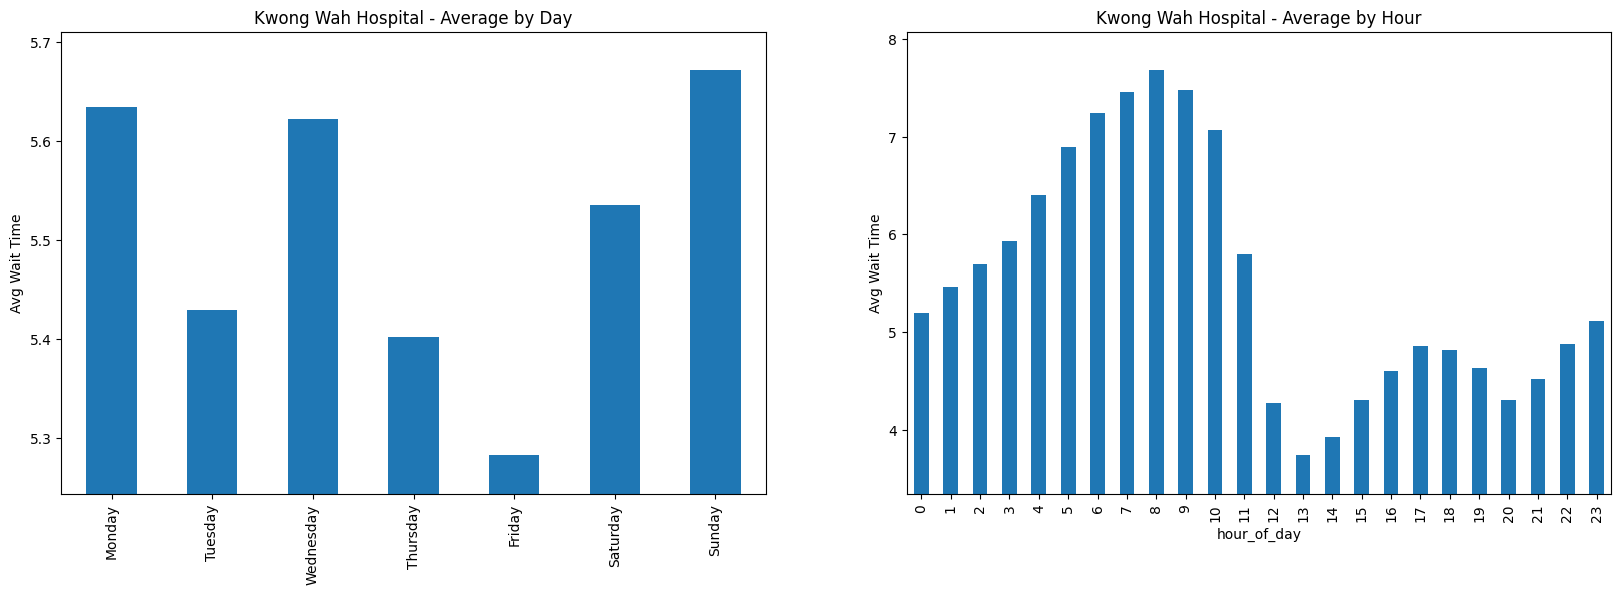

Kwong Wah Hospital - Day of Week Stats:
Most busy: Sunday
Least busy: Friday
Kwong Wah Hospital - Hour of Day Stats:
Most busy: 8
Least busy: 13


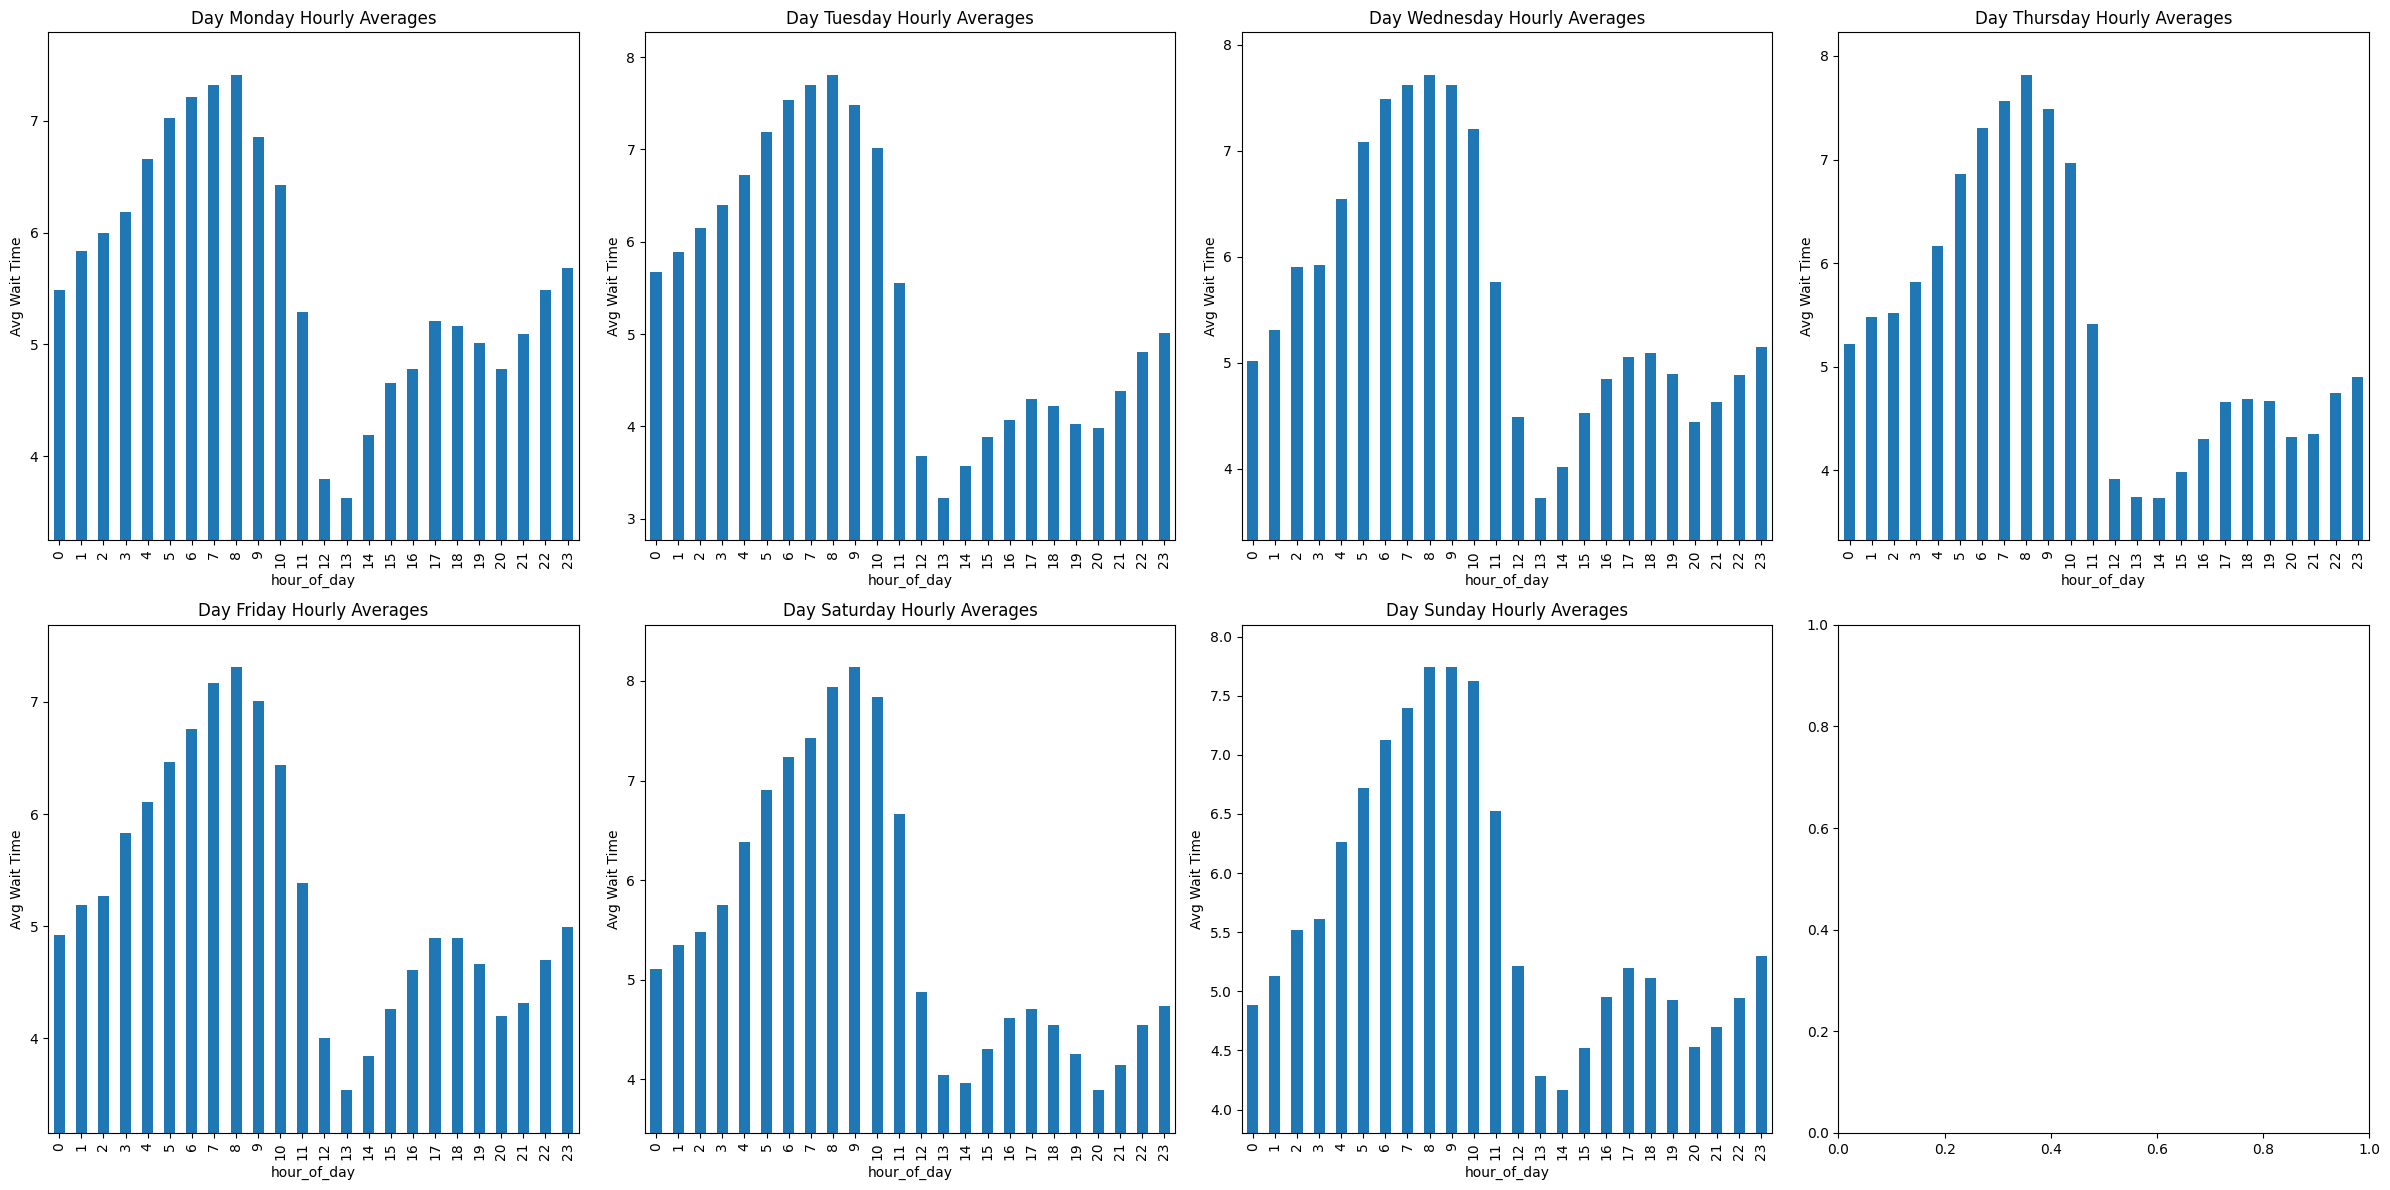

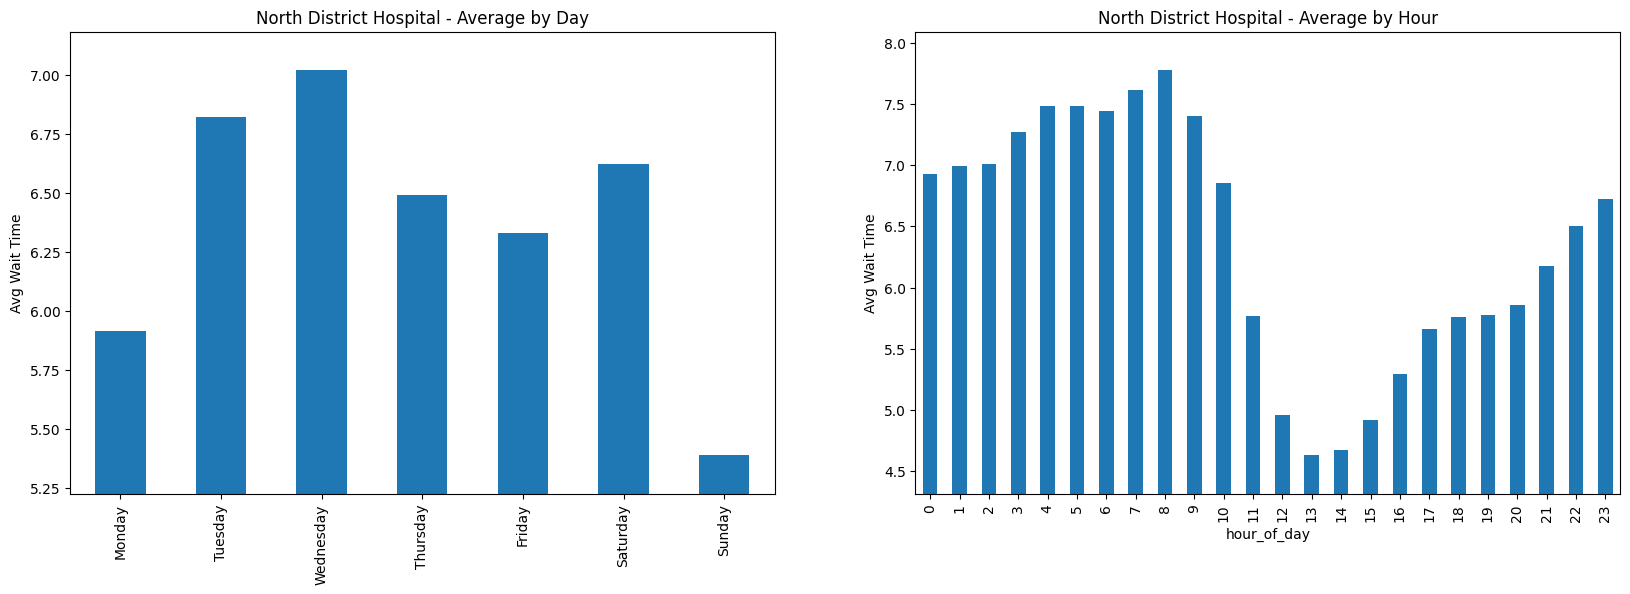

North District Hospital - Day of Week Stats:
Most busy: Wednesday
Least busy: Sunday
North District Hospital - Hour of Day Stats:
Most busy: 8
Least busy: 13


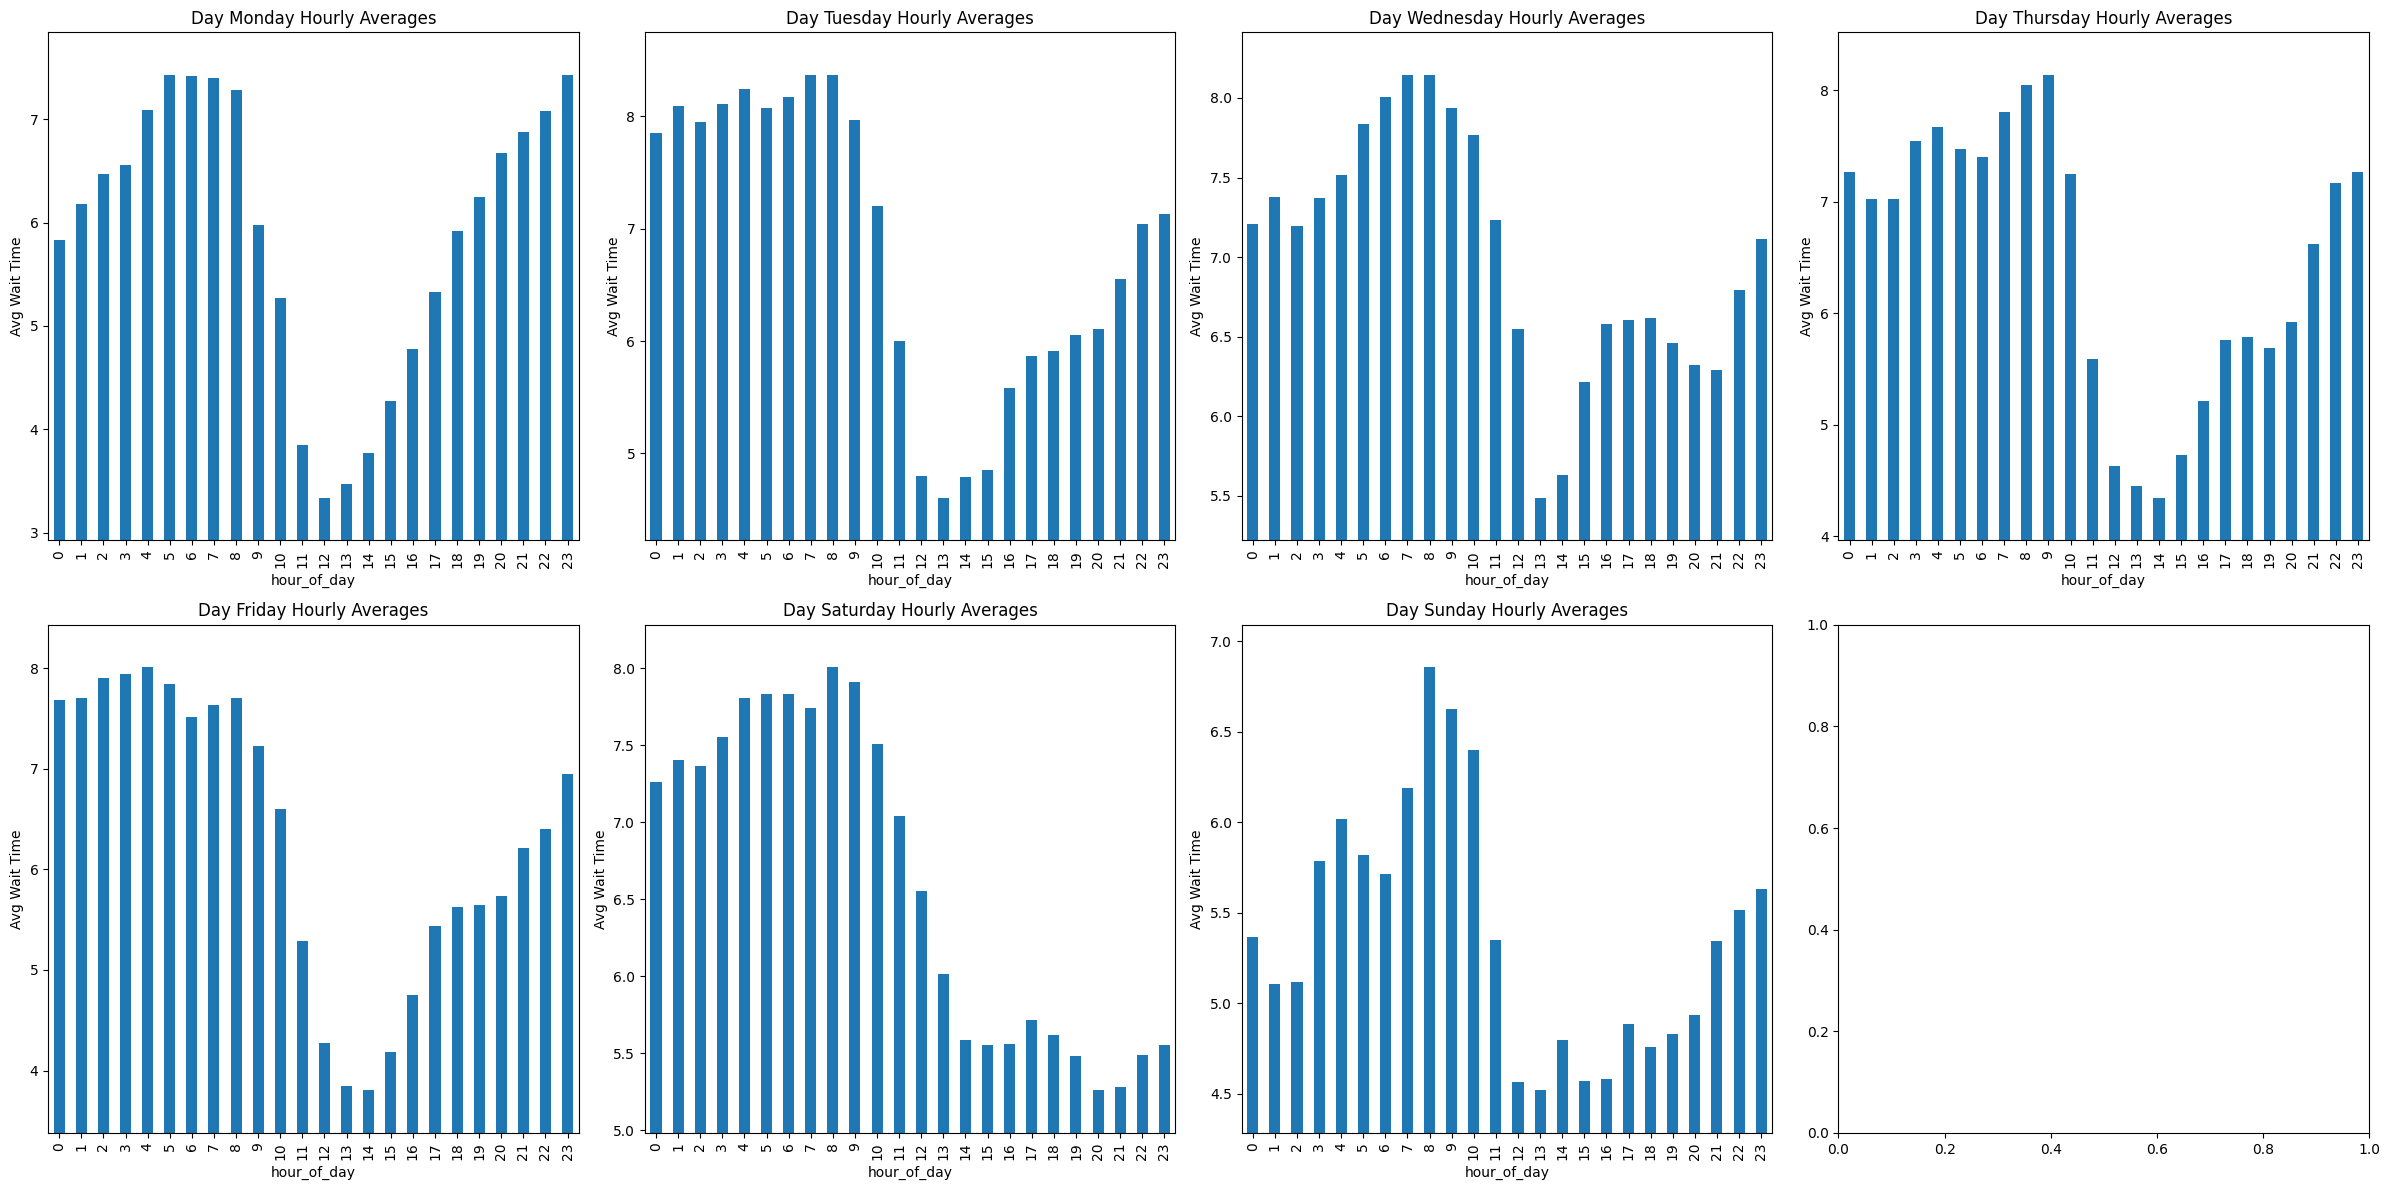

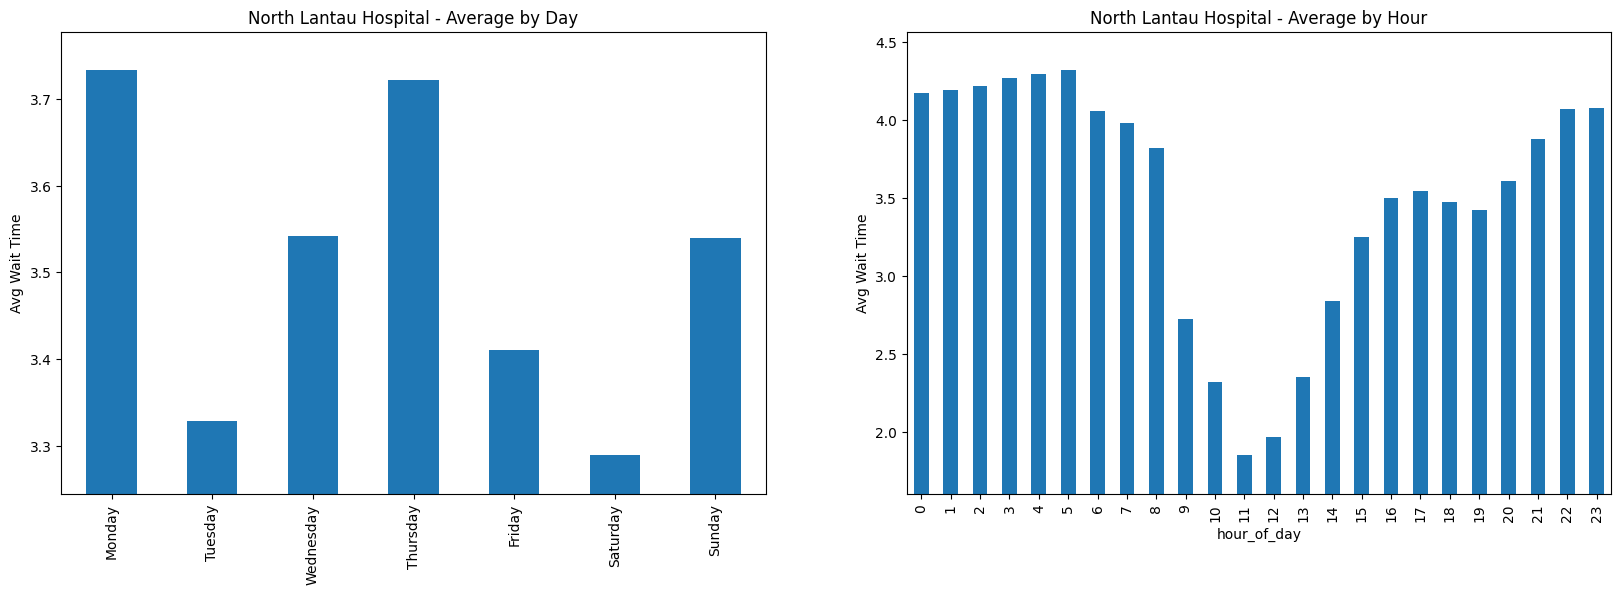

North Lantau Hospital - Day of Week Stats:
Most busy: Monday
Least busy: Saturday
North Lantau Hospital - Hour of Day Stats:
Most busy: 5
Least busy: 11


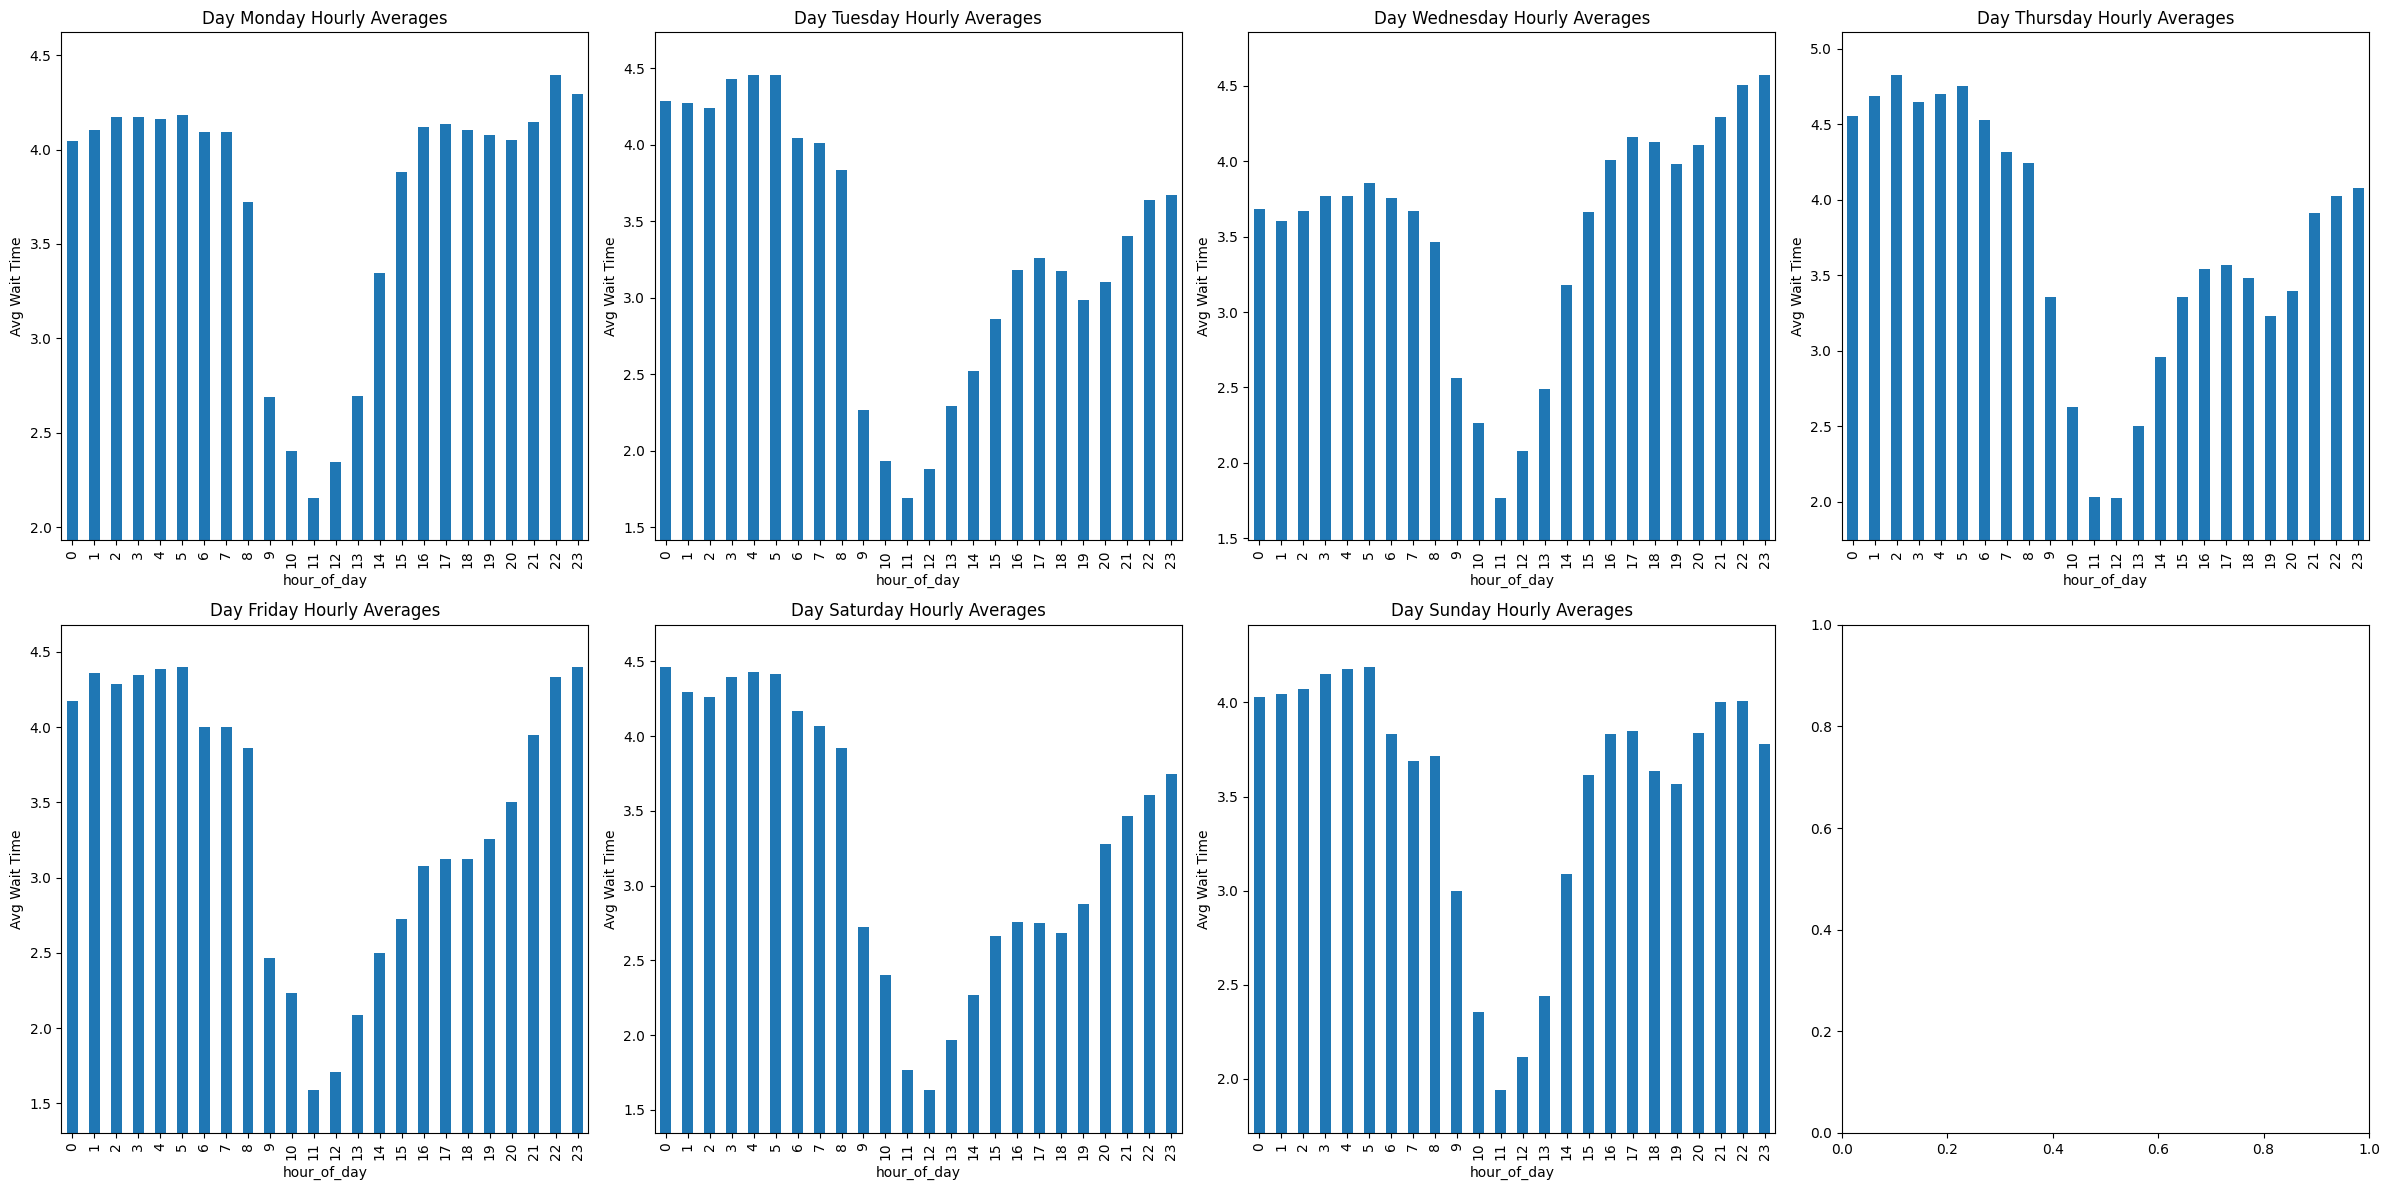

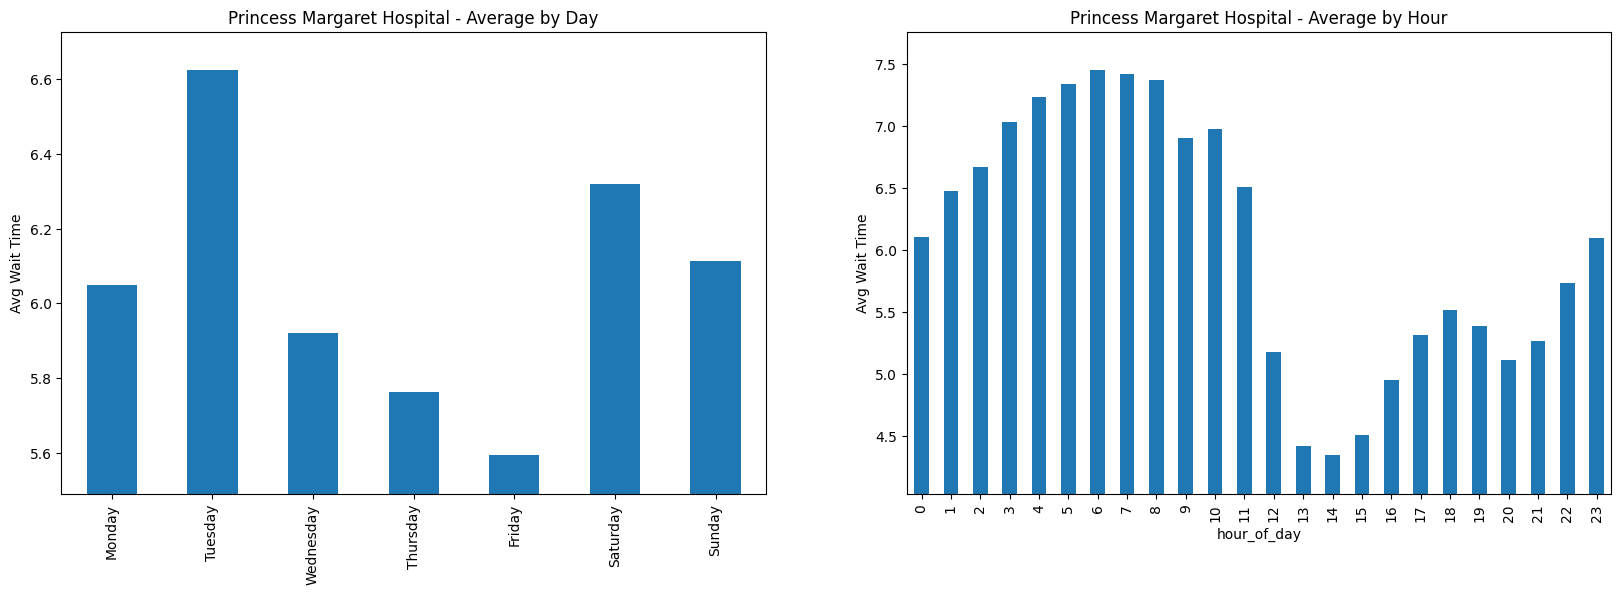

Princess Margaret Hospital - Day of Week Stats:
Most busy: Tuesday
Least busy: Friday
Princess Margaret Hospital - Hour of Day Stats:
Most busy: 6
Least busy: 14


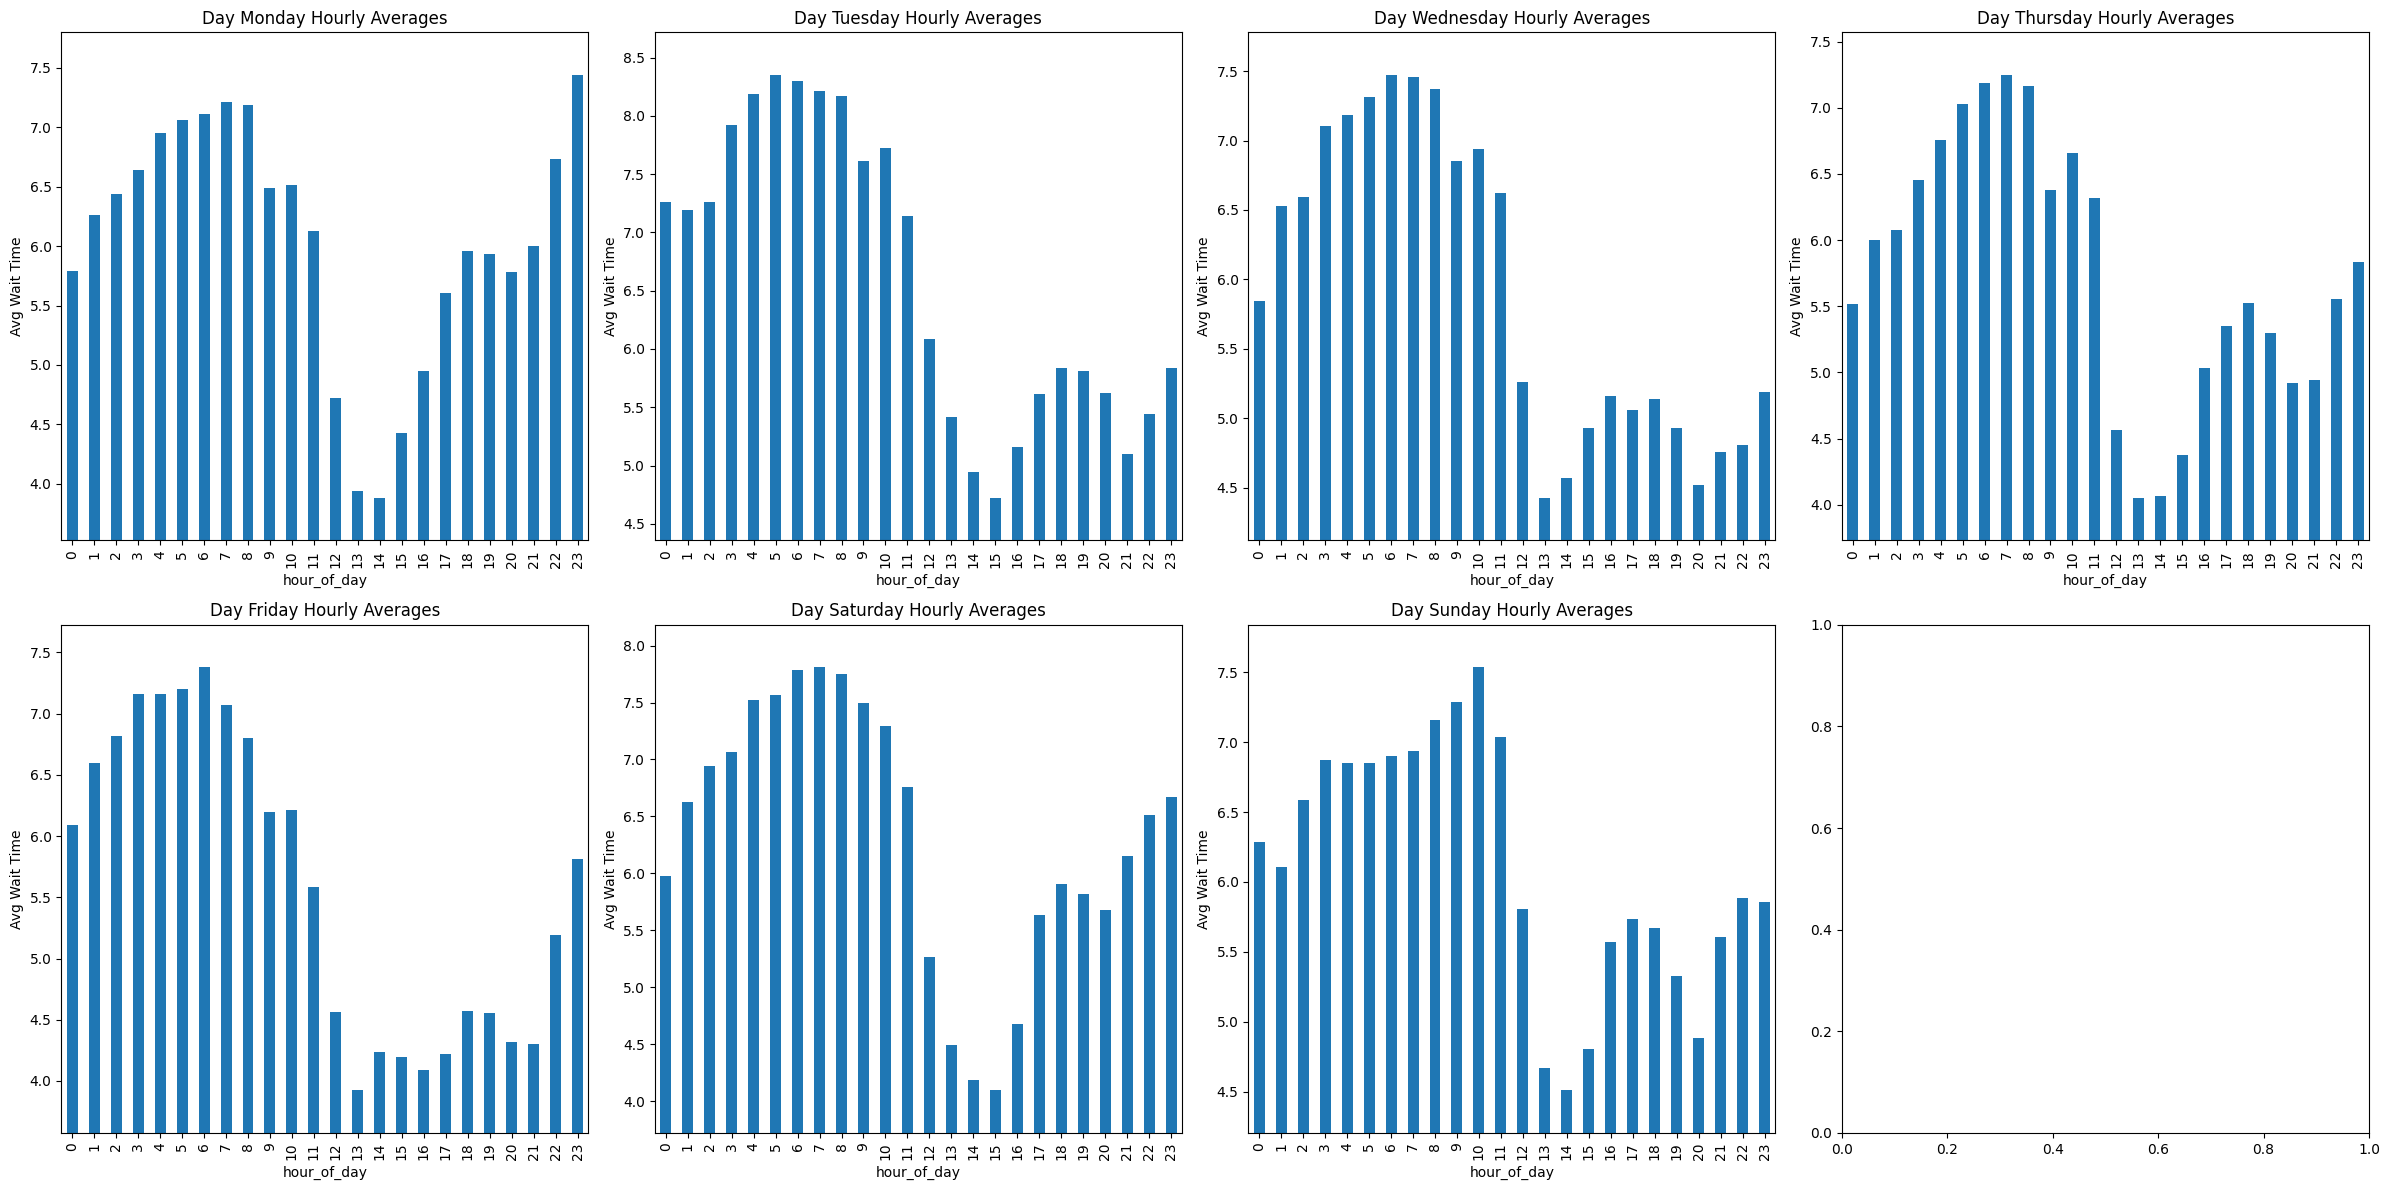

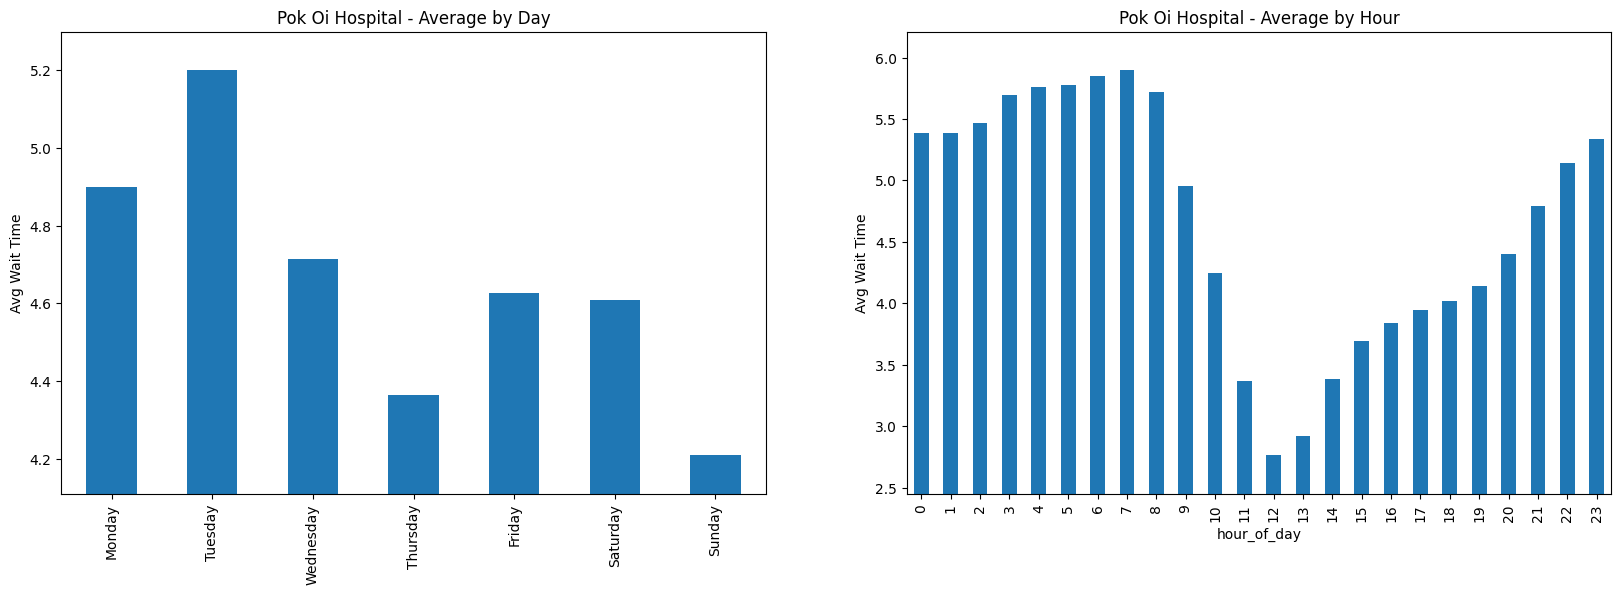

Pok Oi Hospital - Day of Week Stats:
Most busy: Tuesday
Least busy: Sunday
Pok Oi Hospital - Hour of Day Stats:
Most busy: 7
Least busy: 12


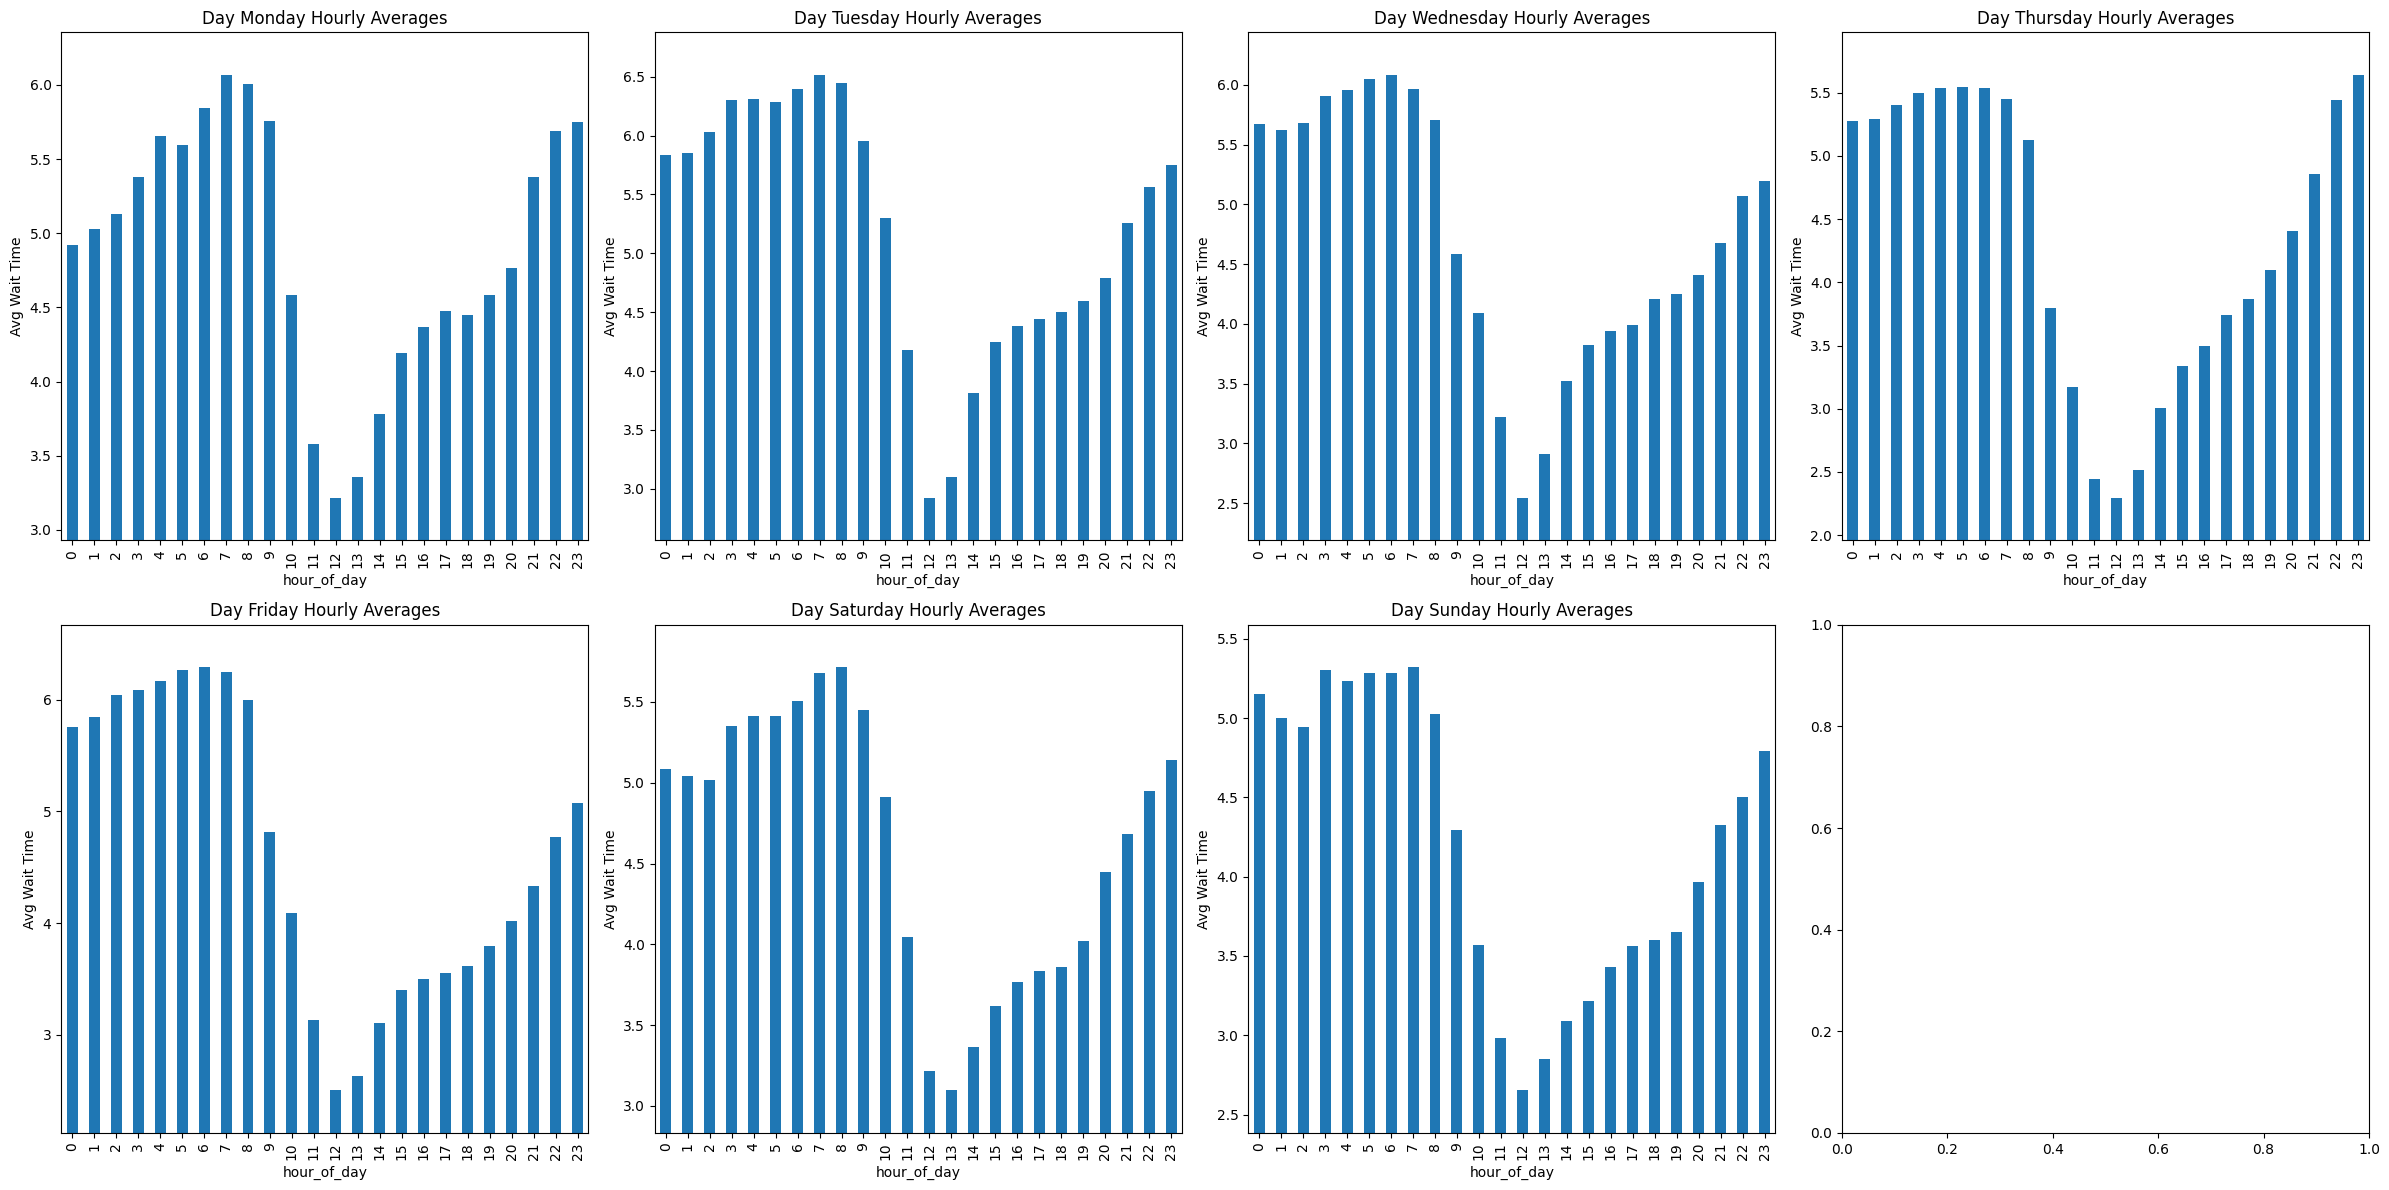

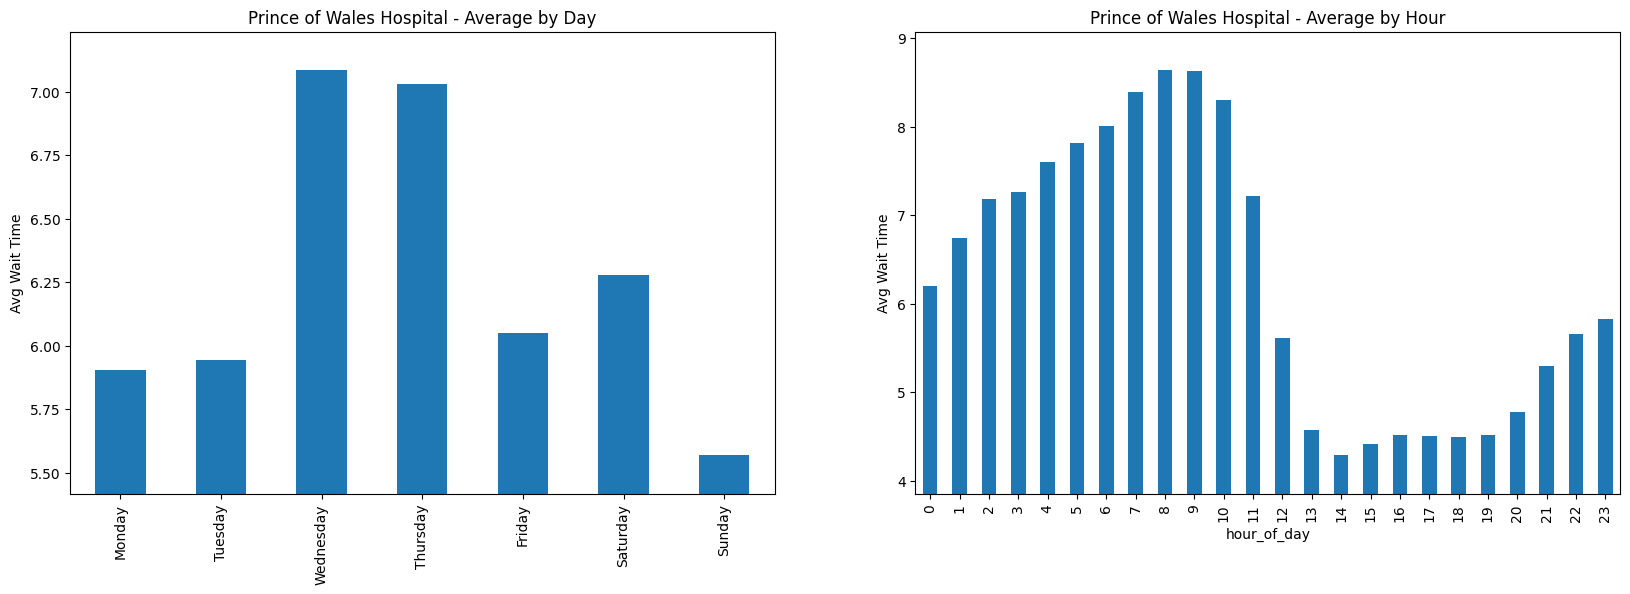

Prince of Wales Hospital - Day of Week Stats:
Most busy: Wednesday
Least busy: Sunday
Prince of Wales Hospital - Hour of Day Stats:
Most busy: 8
Least busy: 14


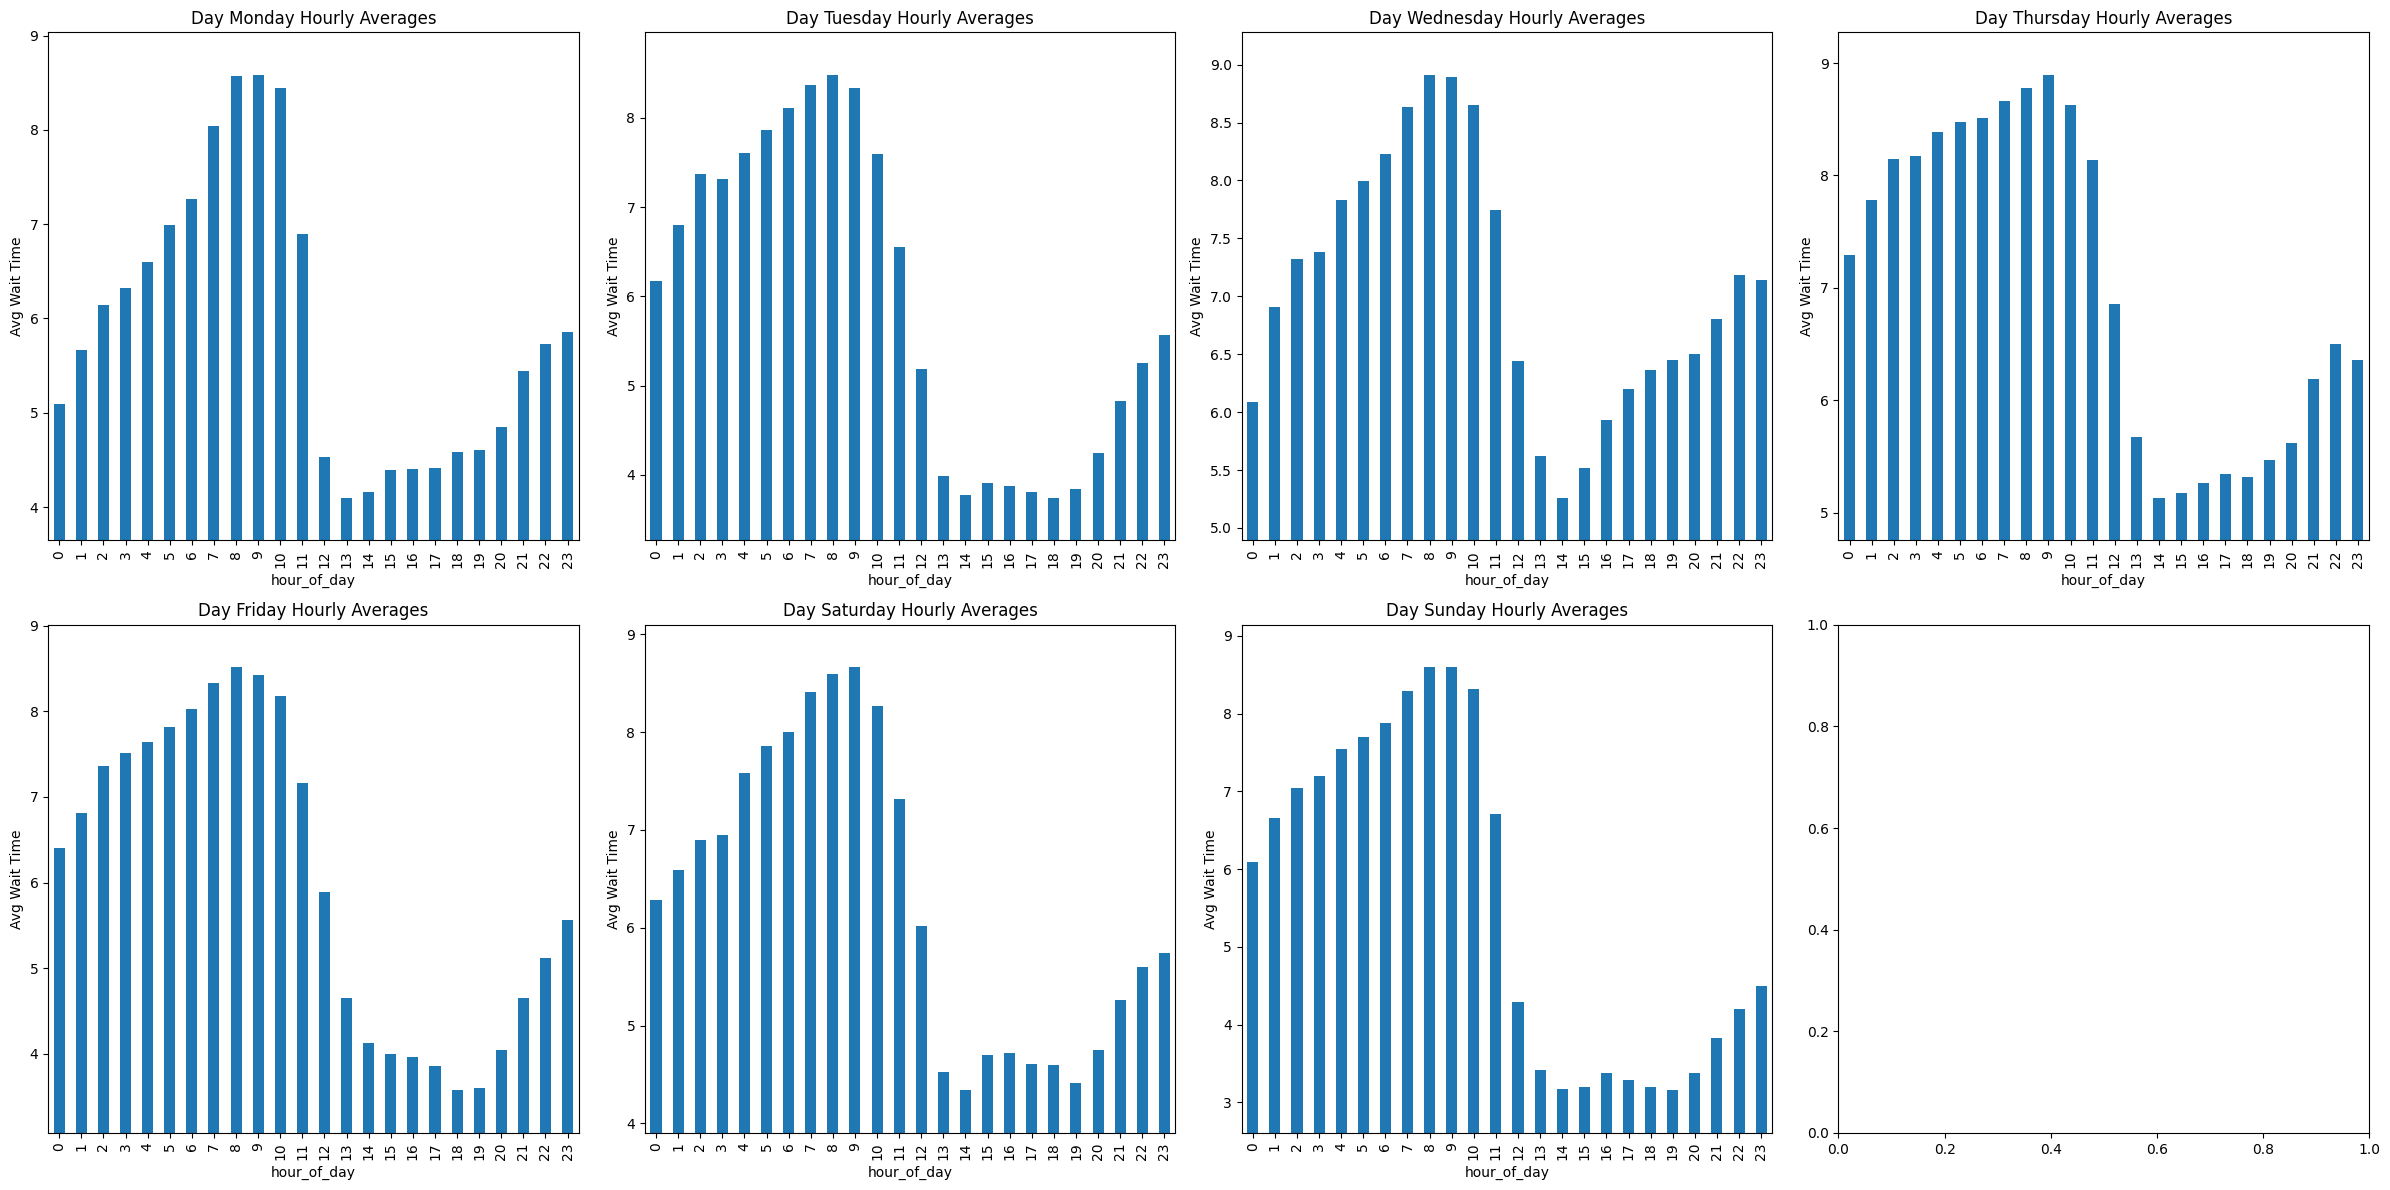

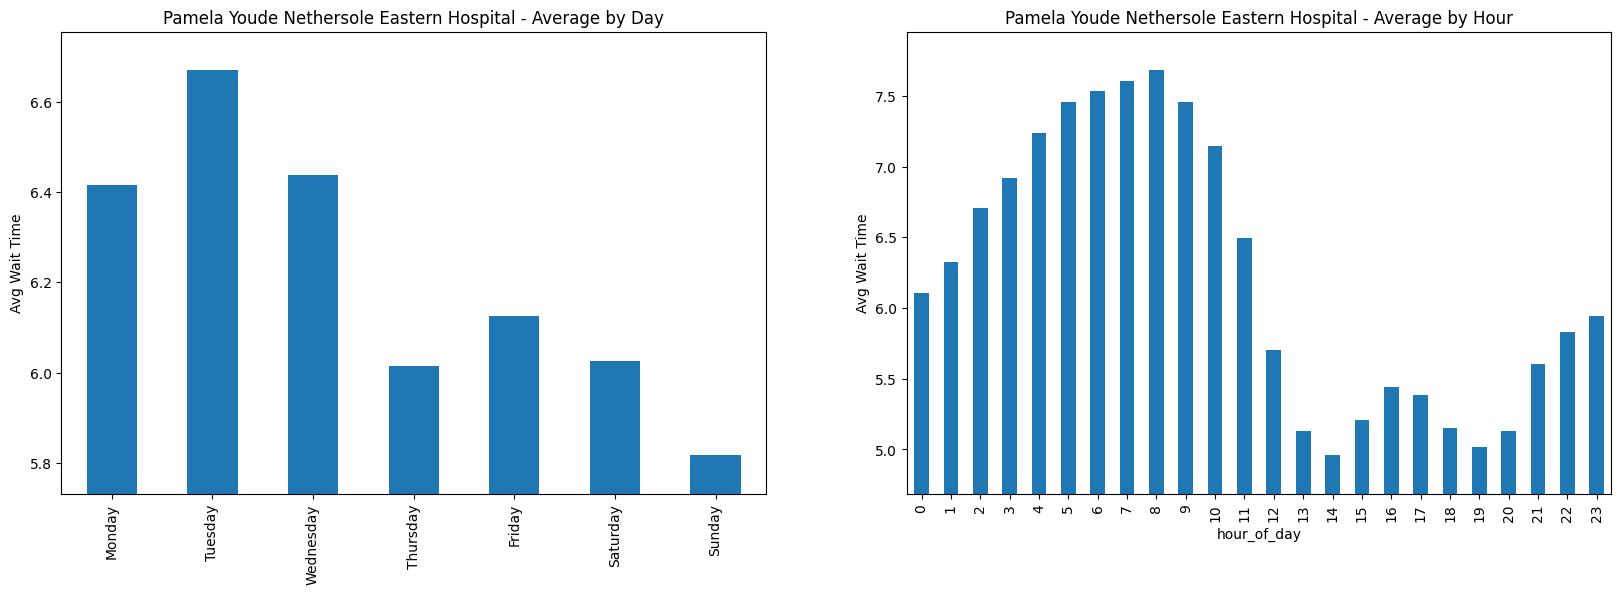

Pamela Youde Nethersole Eastern Hospital - Day of Week Stats:
Most busy: Tuesday
Least busy: Sunday
Pamela Youde Nethersole Eastern Hospital - Hour of Day Stats:
Most busy: 8
Least busy: 14


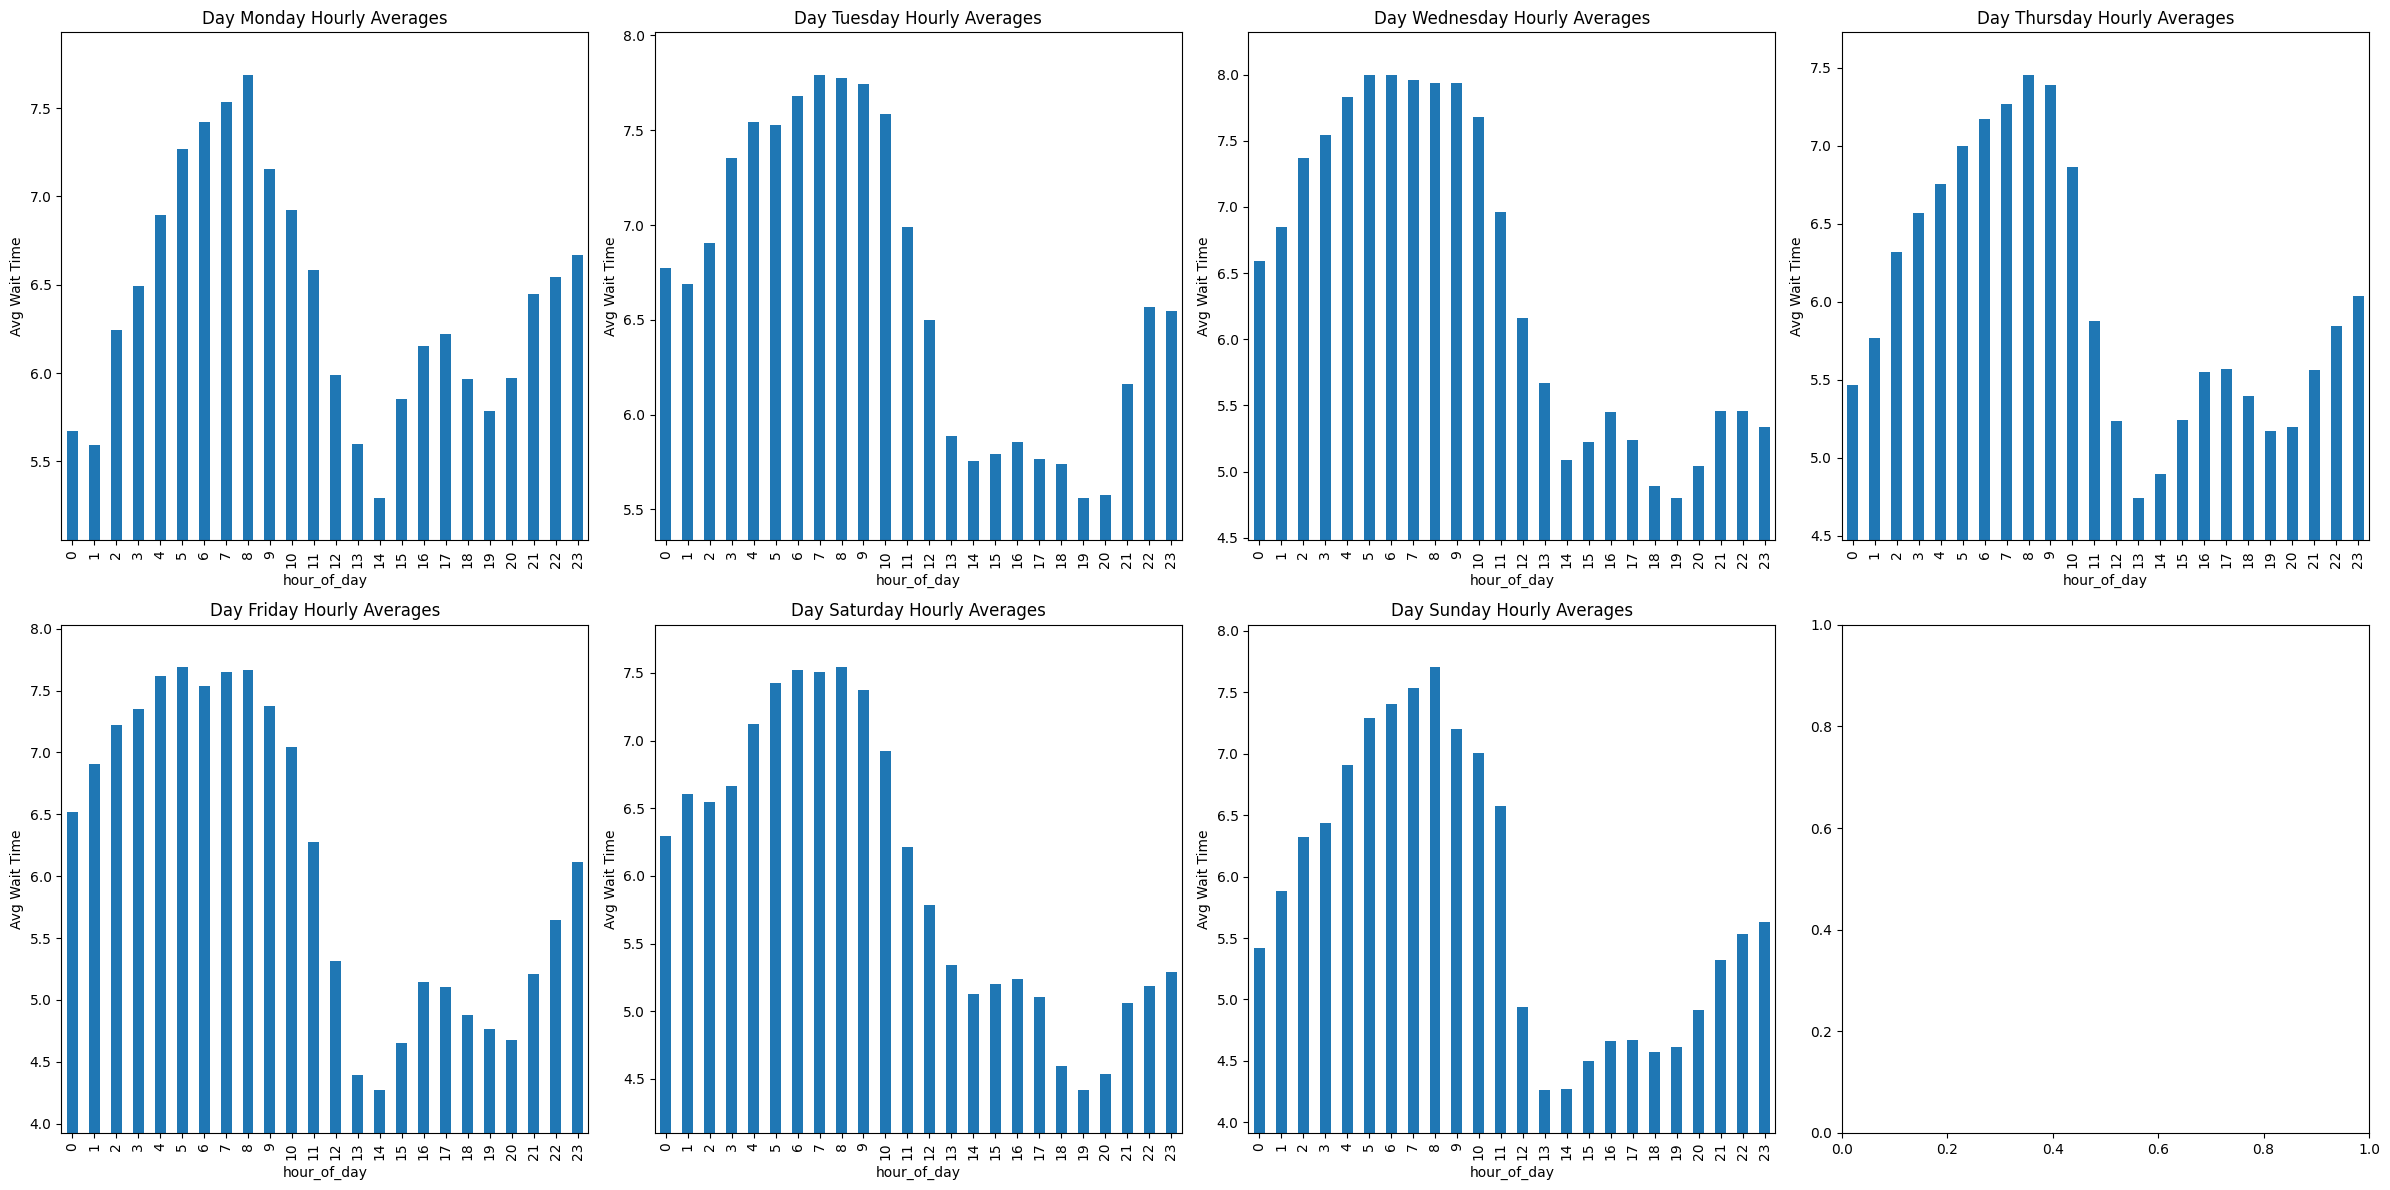

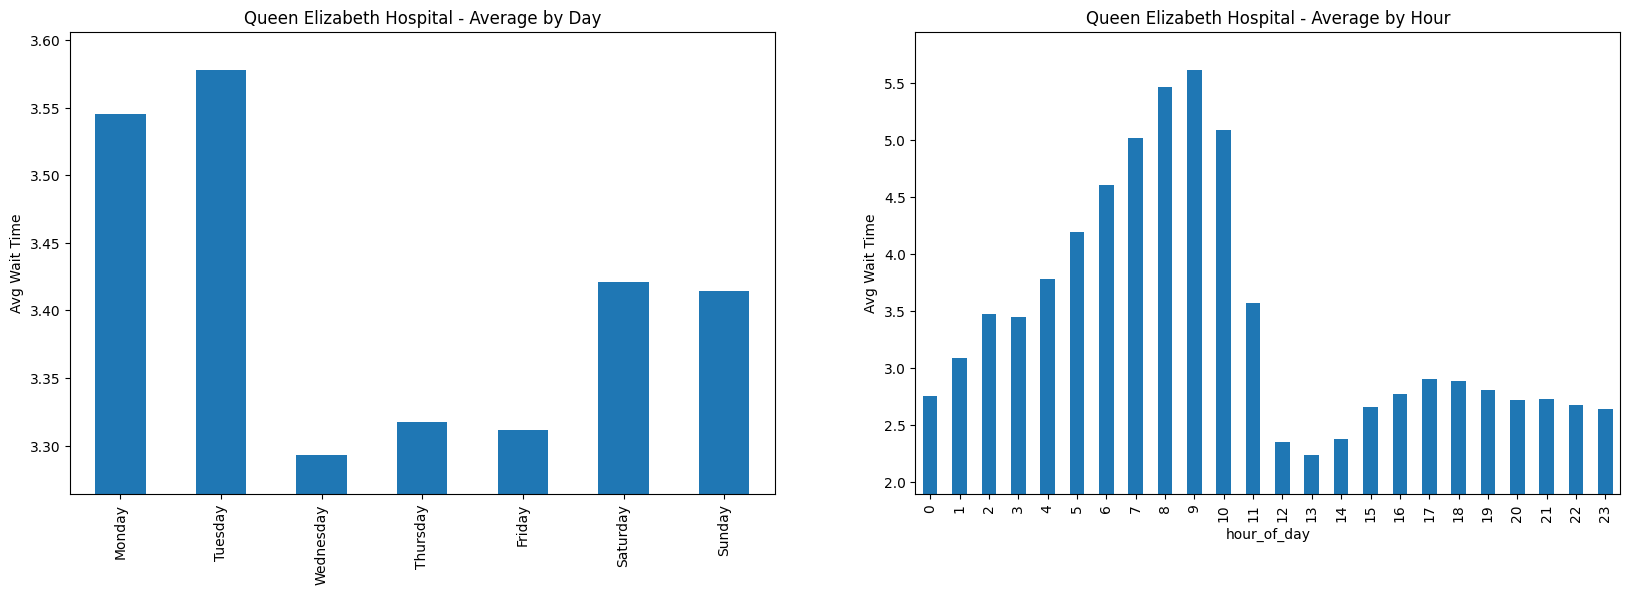

Queen Elizabeth Hospital - Day of Week Stats:
Most busy: Tuesday
Least busy: Wednesday
Queen Elizabeth Hospital - Hour of Day Stats:
Most busy: 9
Least busy: 13


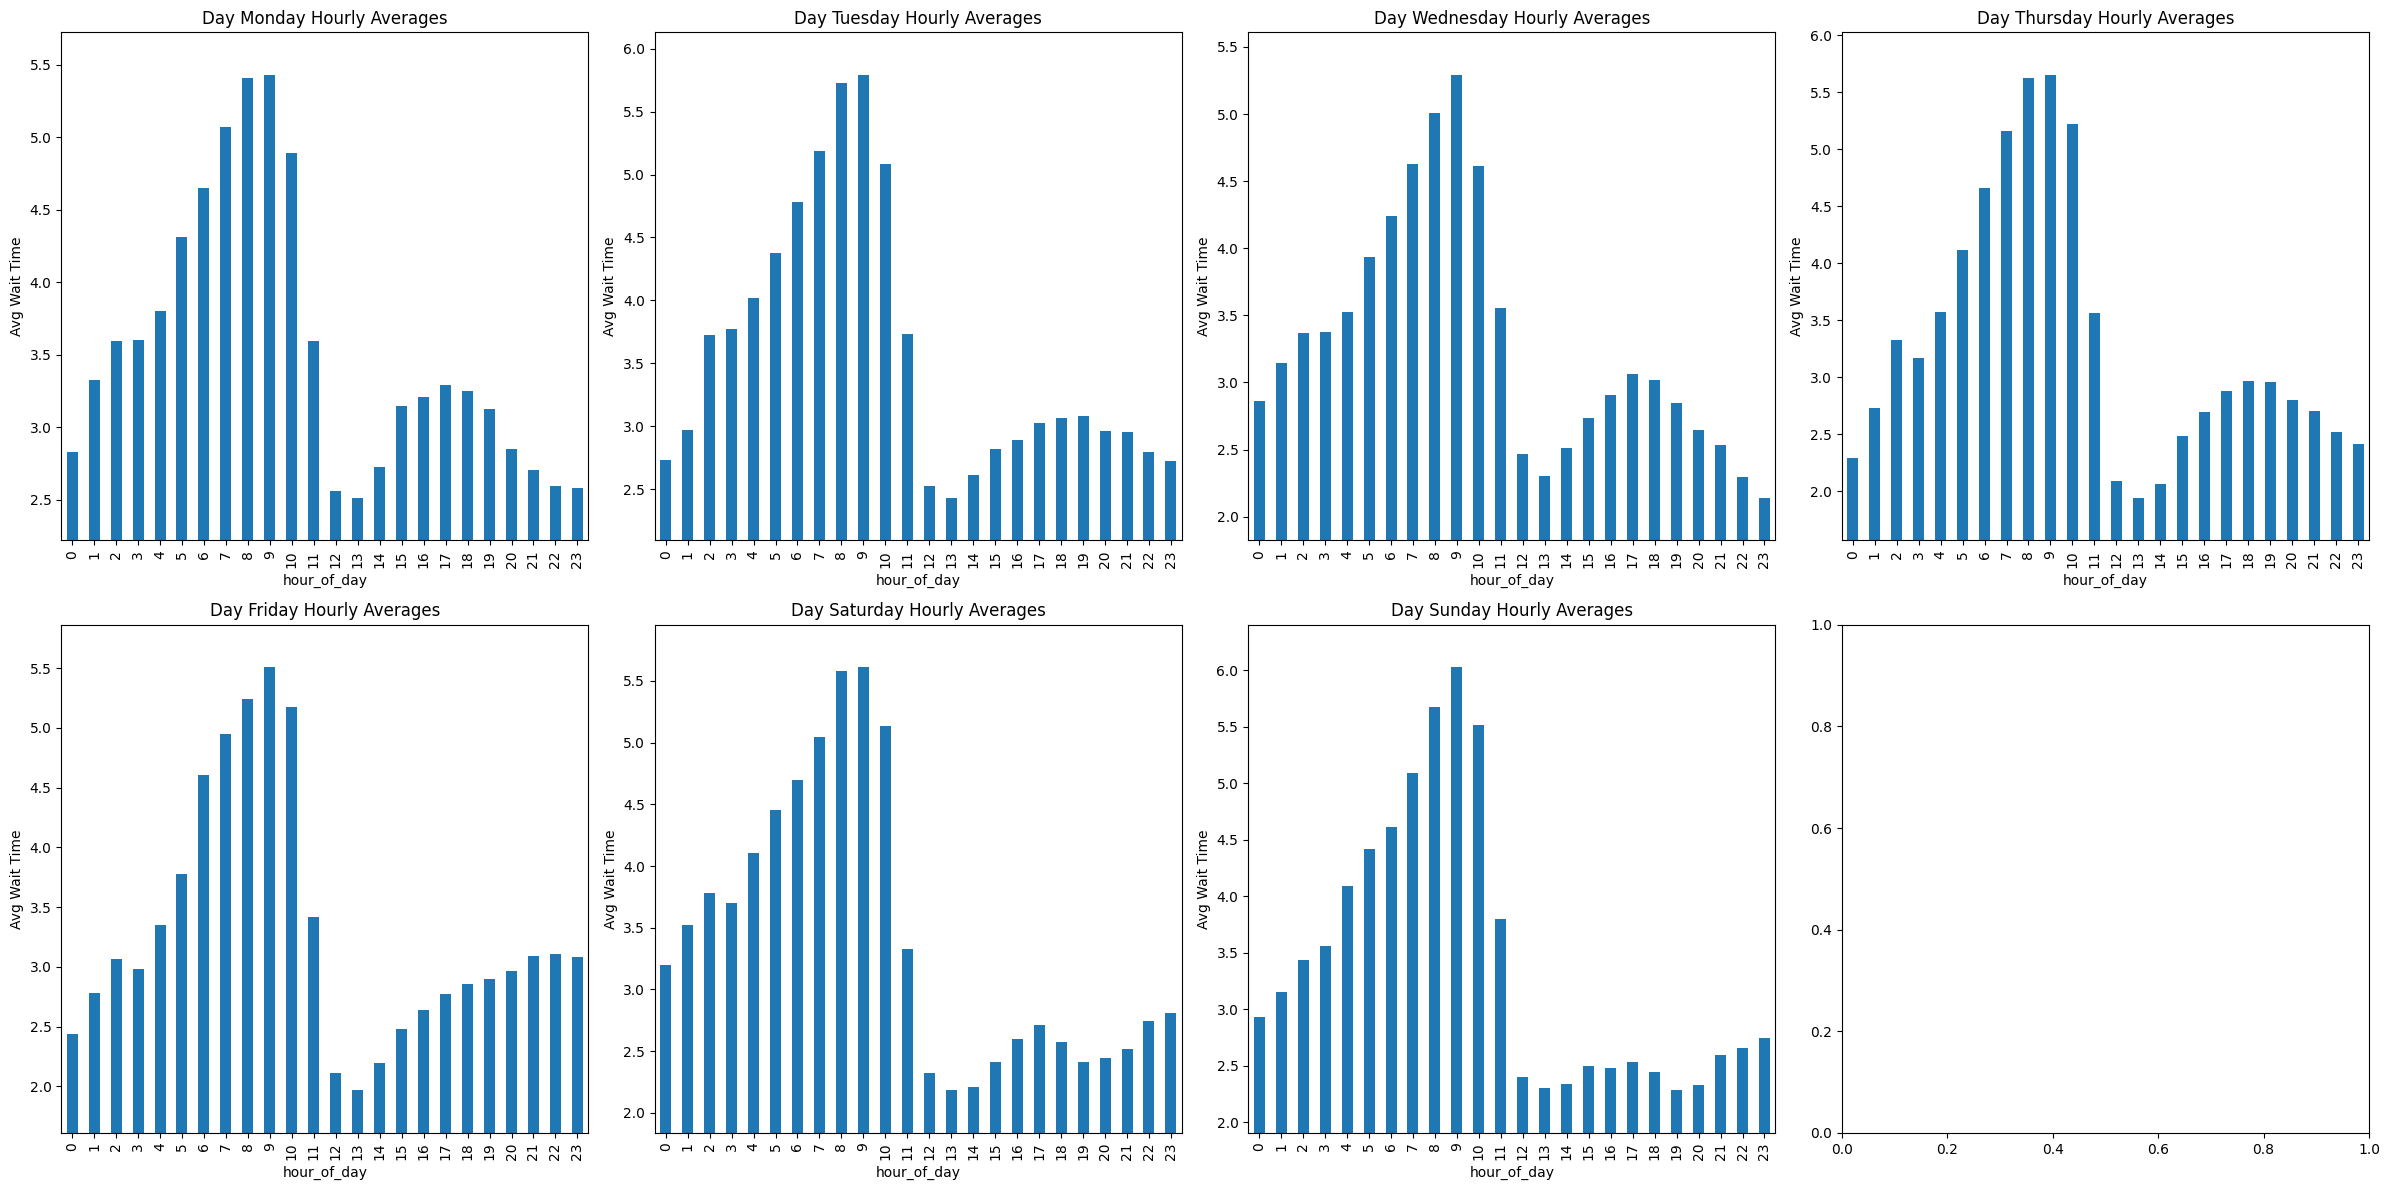

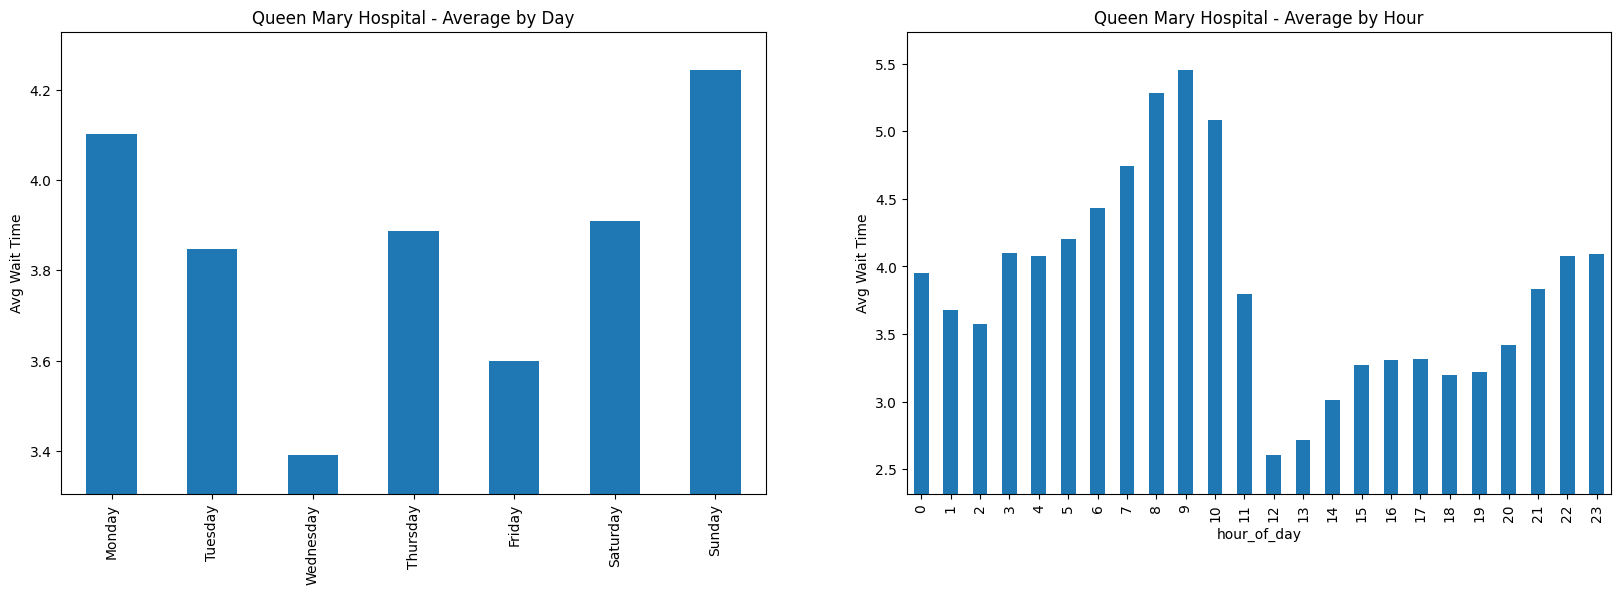

Queen Mary Hospital - Day of Week Stats:
Most busy: Sunday
Least busy: Wednesday
Queen Mary Hospital - Hour of Day Stats:
Most busy: 9
Least busy: 12


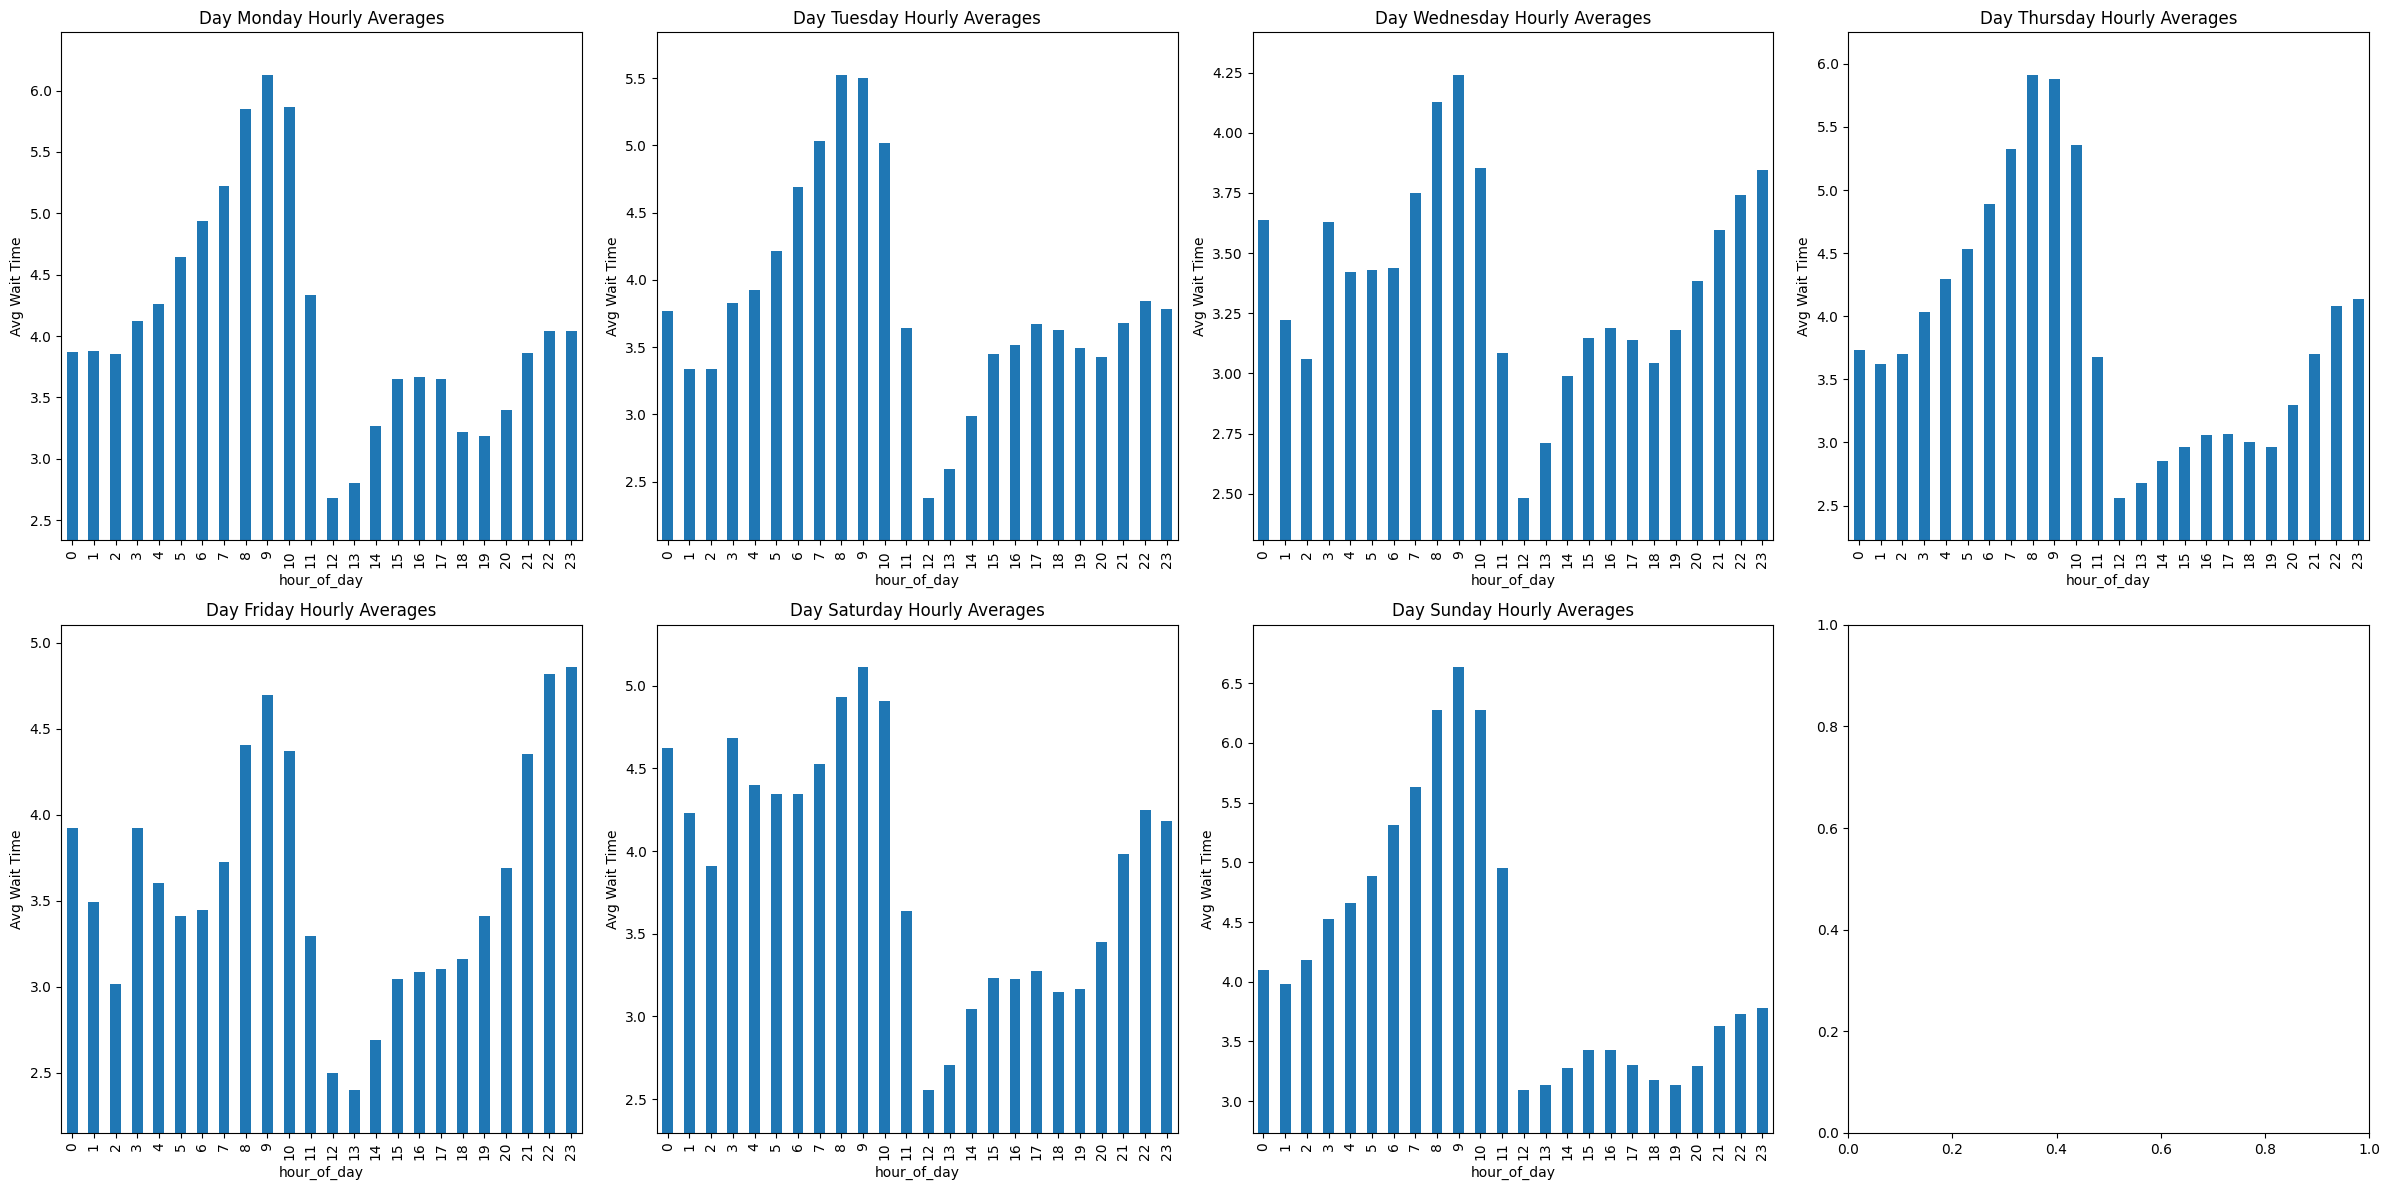

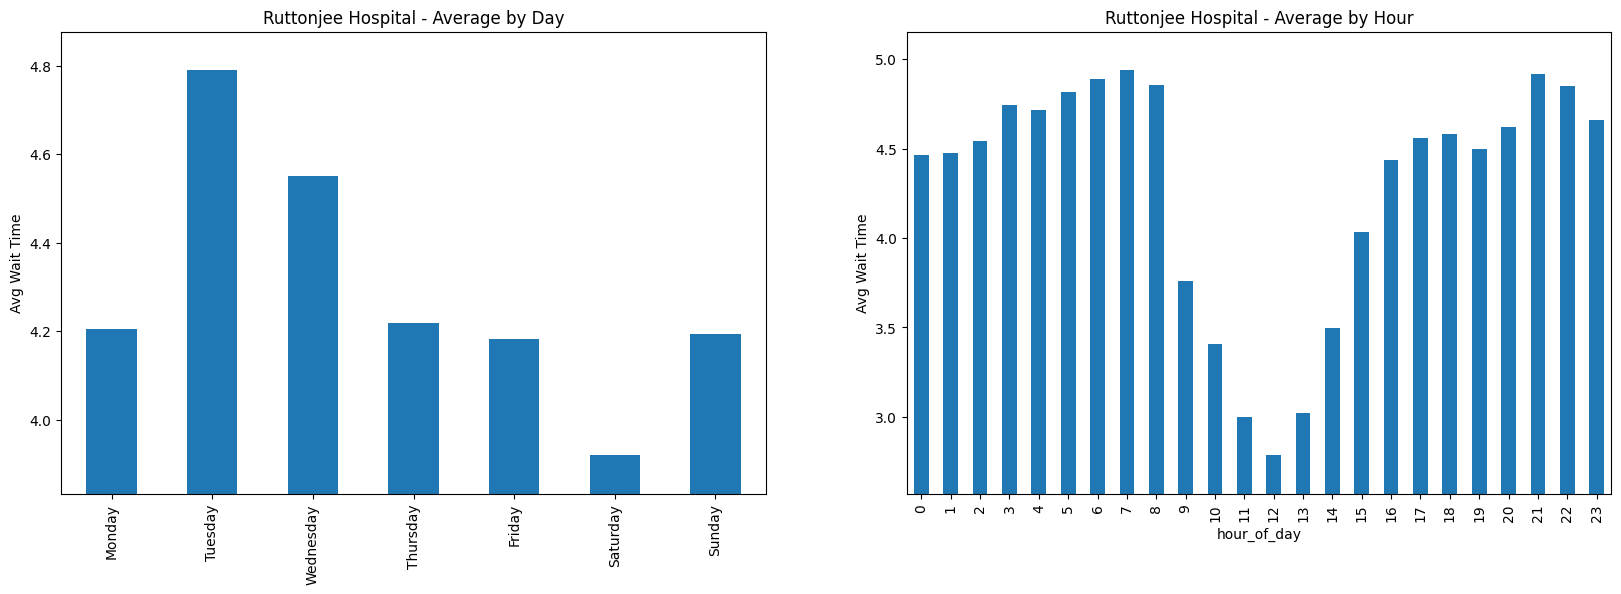

Ruttonjee Hospital - Day of Week Stats:
Most busy: Tuesday
Least busy: Saturday
Ruttonjee Hospital - Hour of Day Stats:
Most busy: 7
Least busy: 12


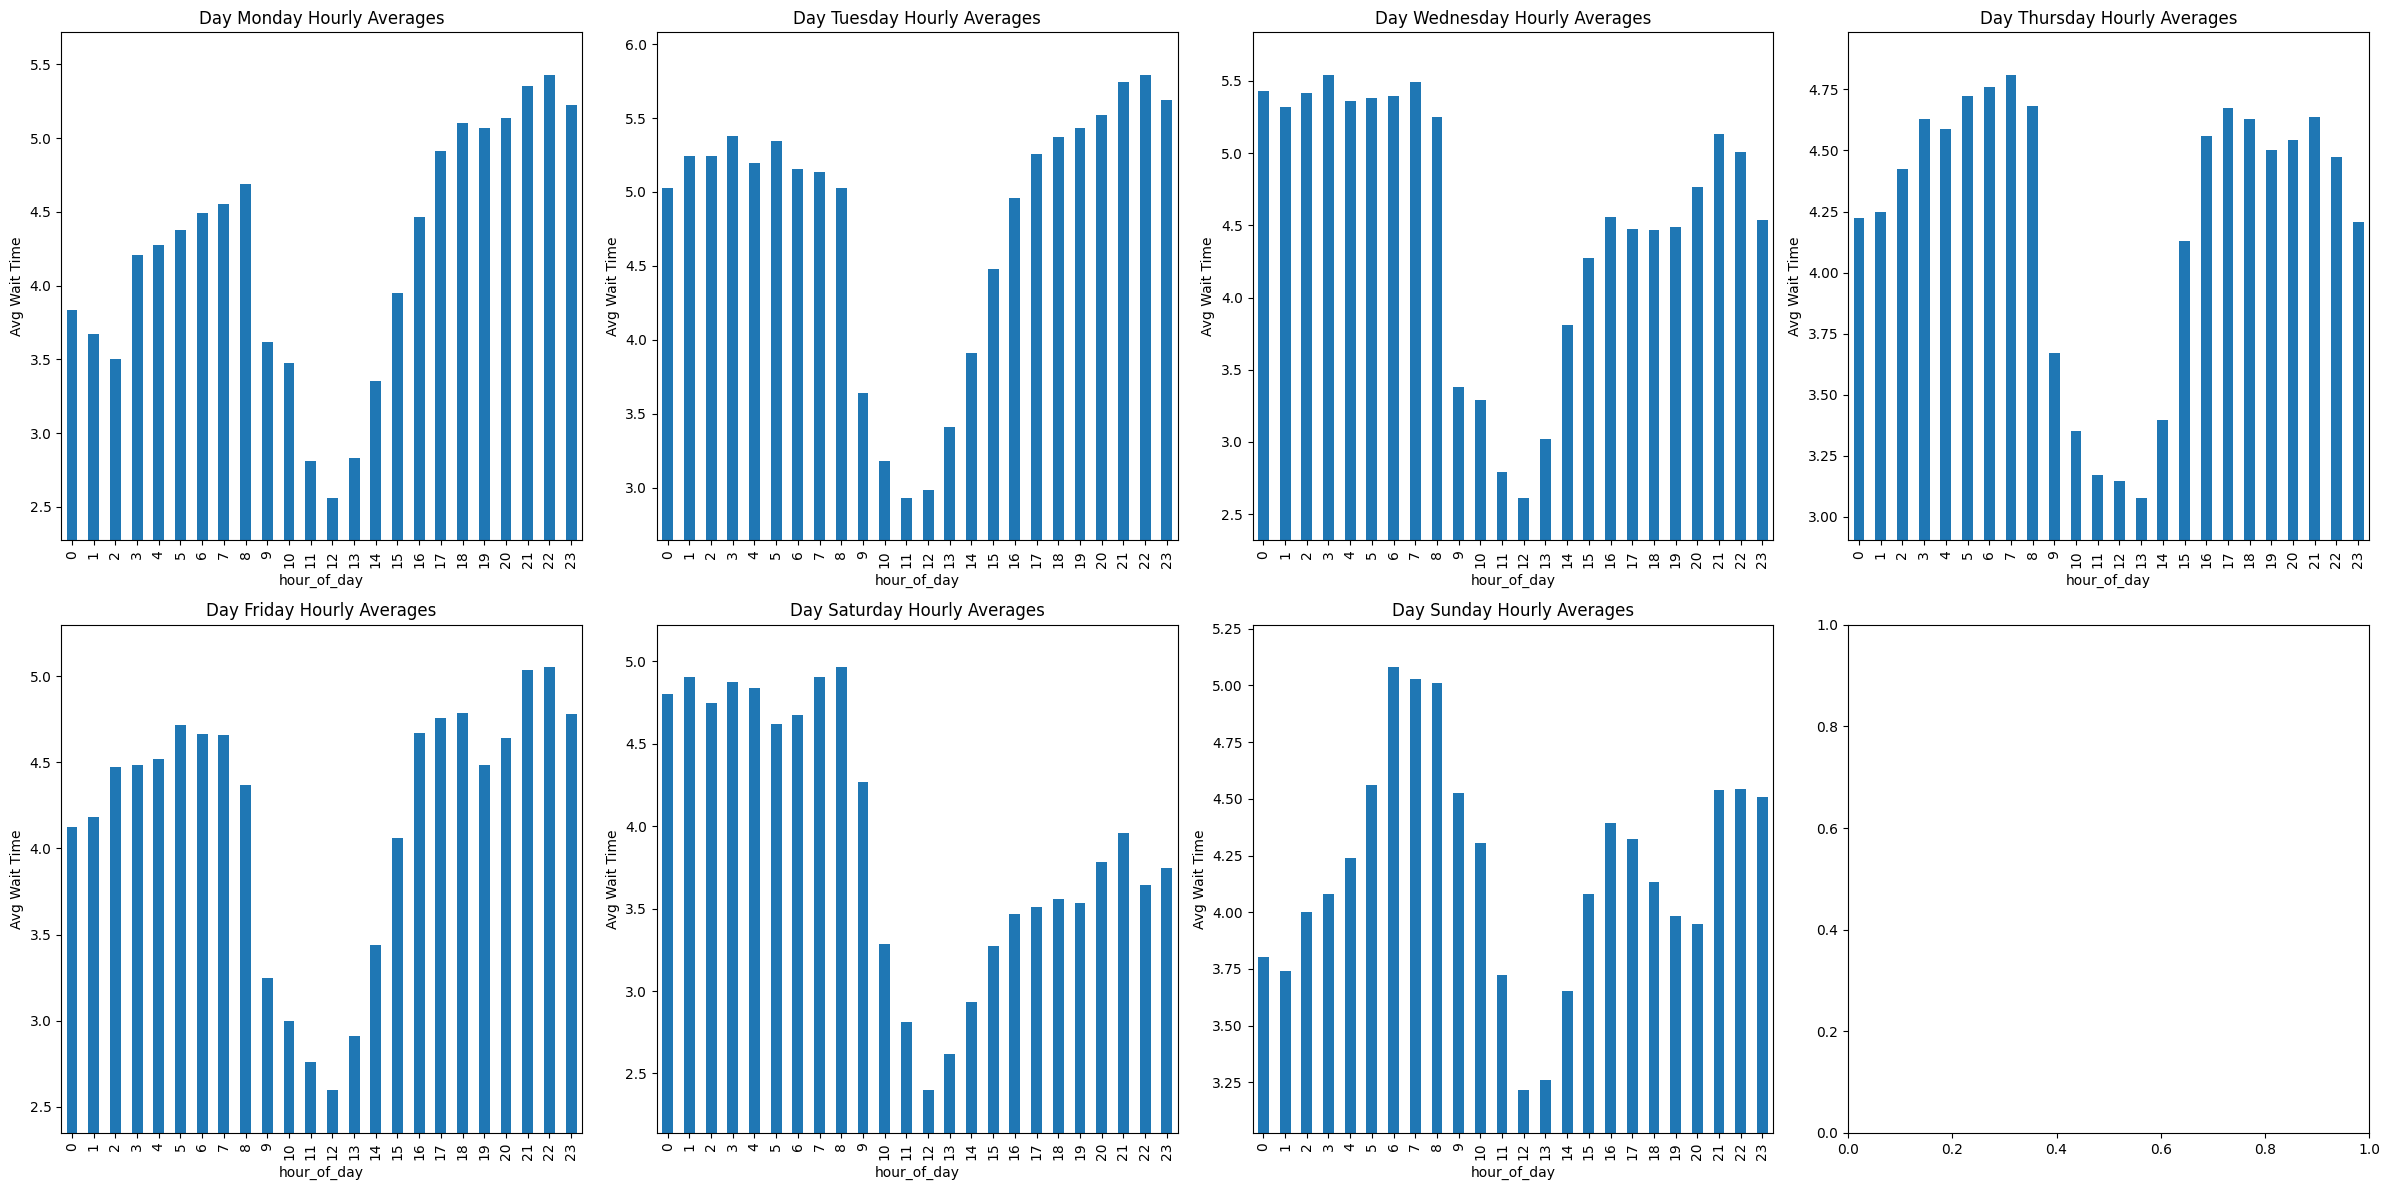

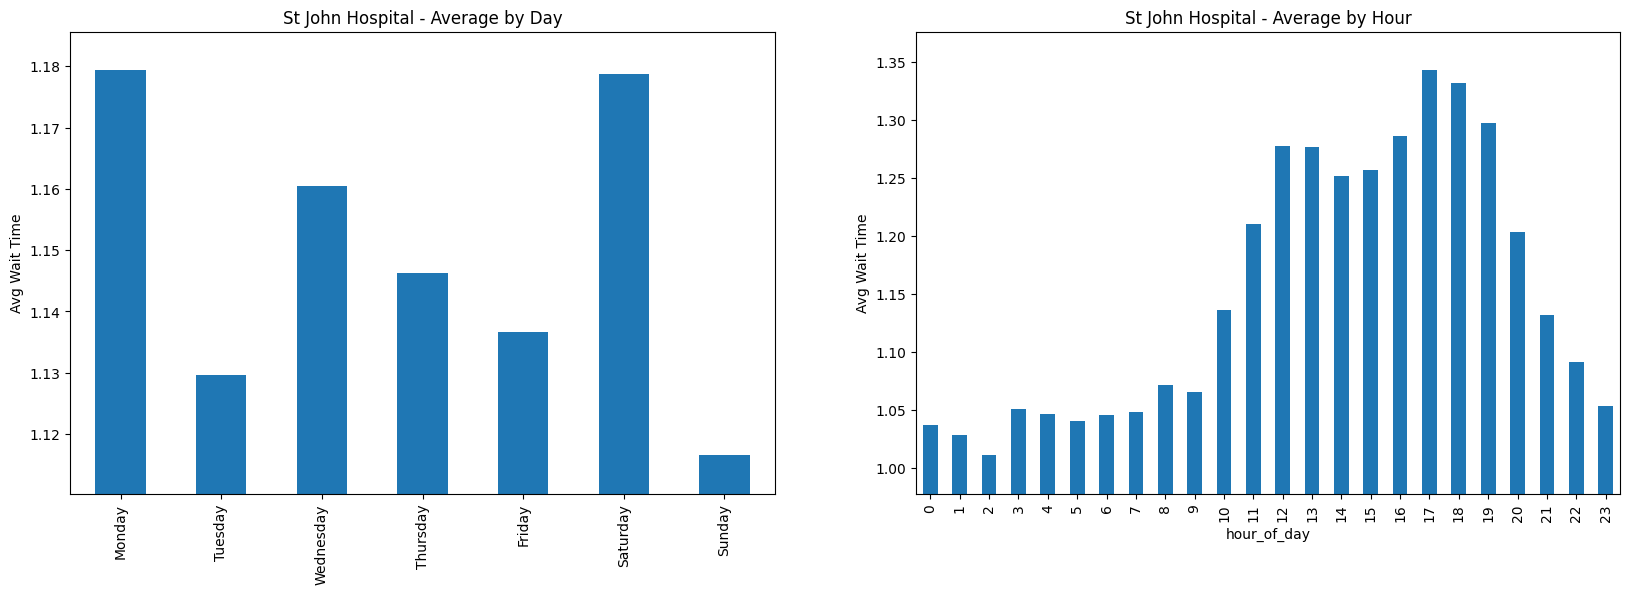

St John Hospital - Day of Week Stats:
Most busy: Monday
Least busy: Sunday
St John Hospital - Hour of Day Stats:
Most busy: 17
Least busy: 2


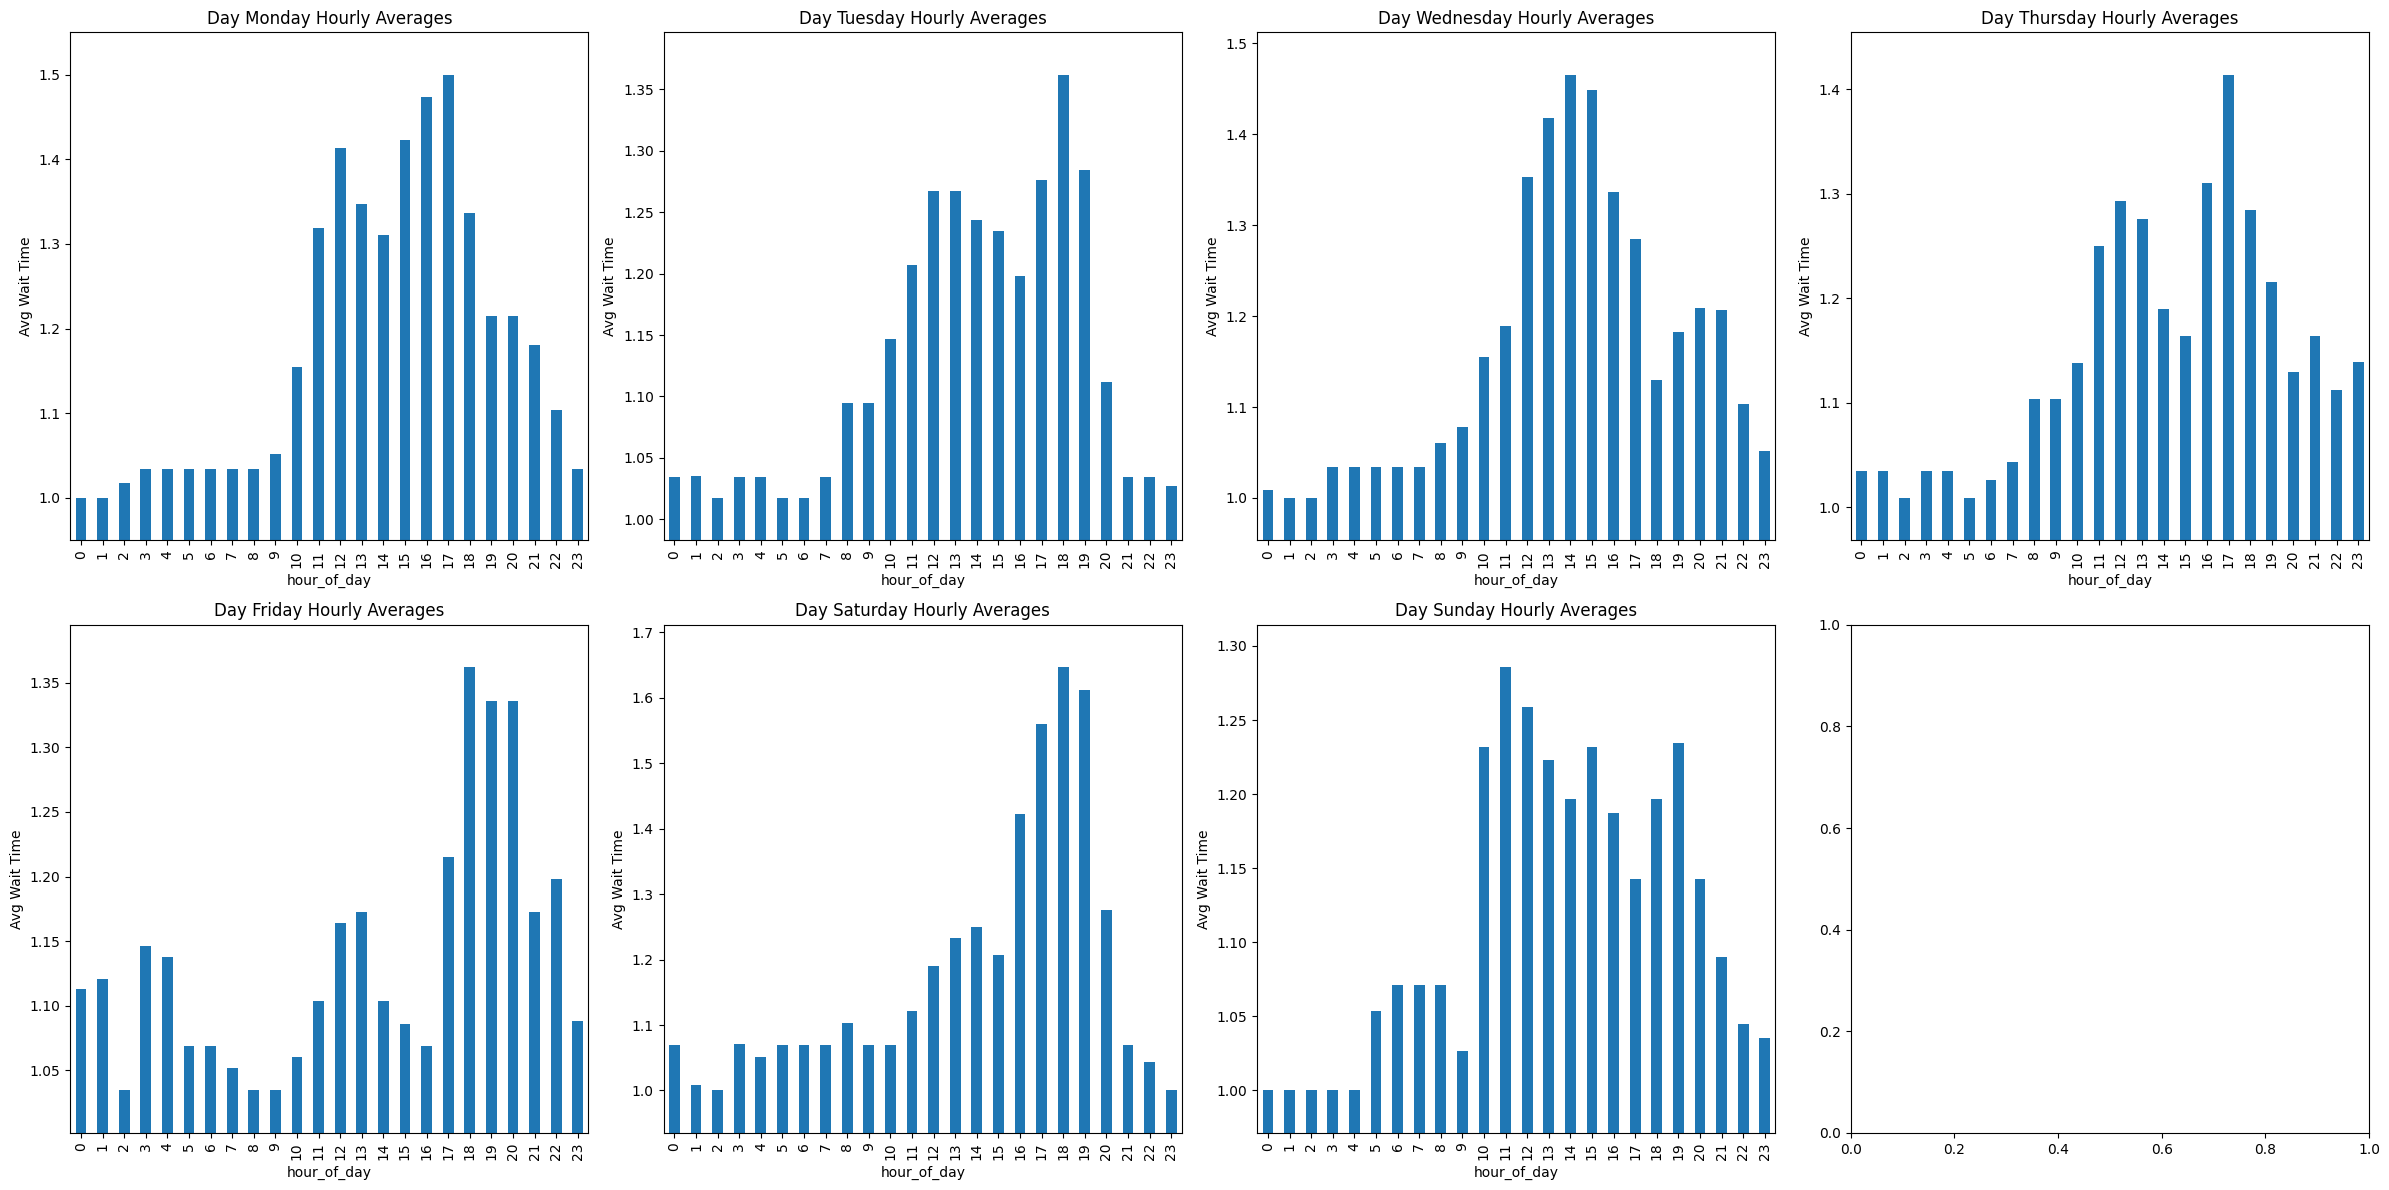

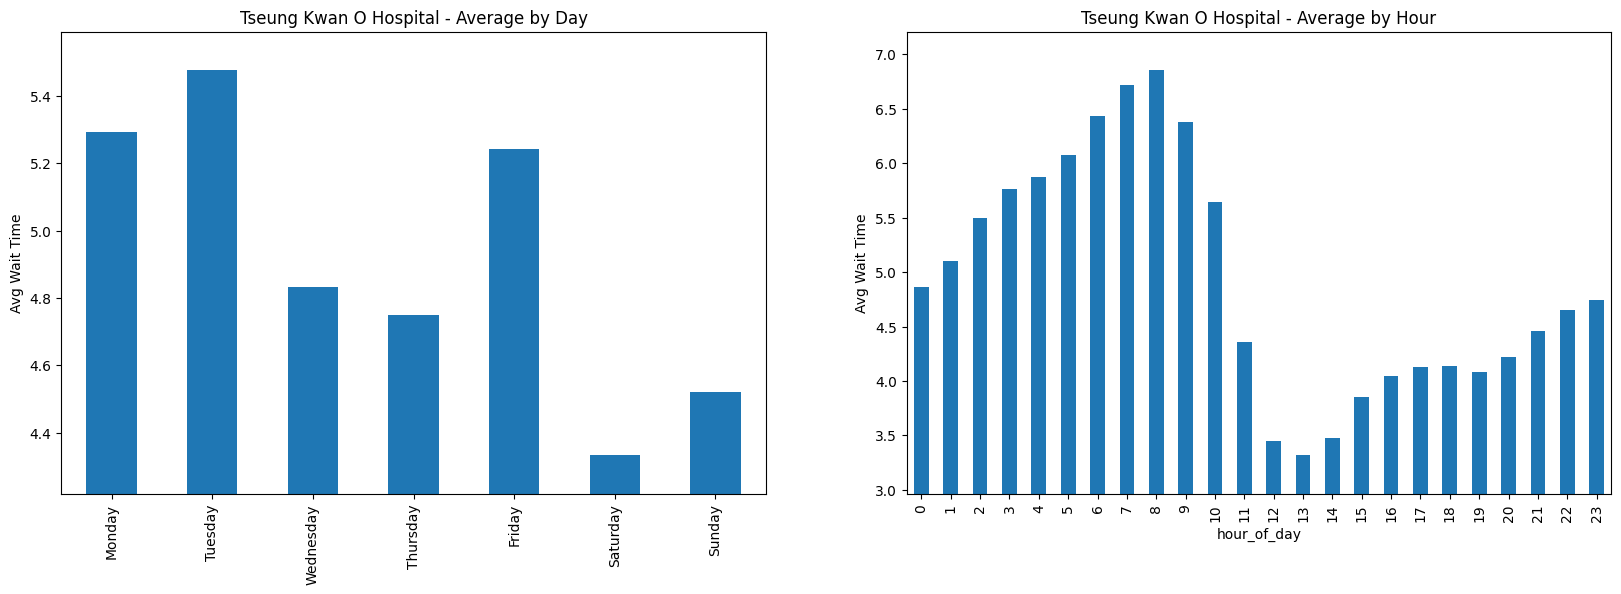

Tseung Kwan O Hospital - Day of Week Stats:
Most busy: Tuesday
Least busy: Saturday
Tseung Kwan O Hospital - Hour of Day Stats:
Most busy: 8
Least busy: 13


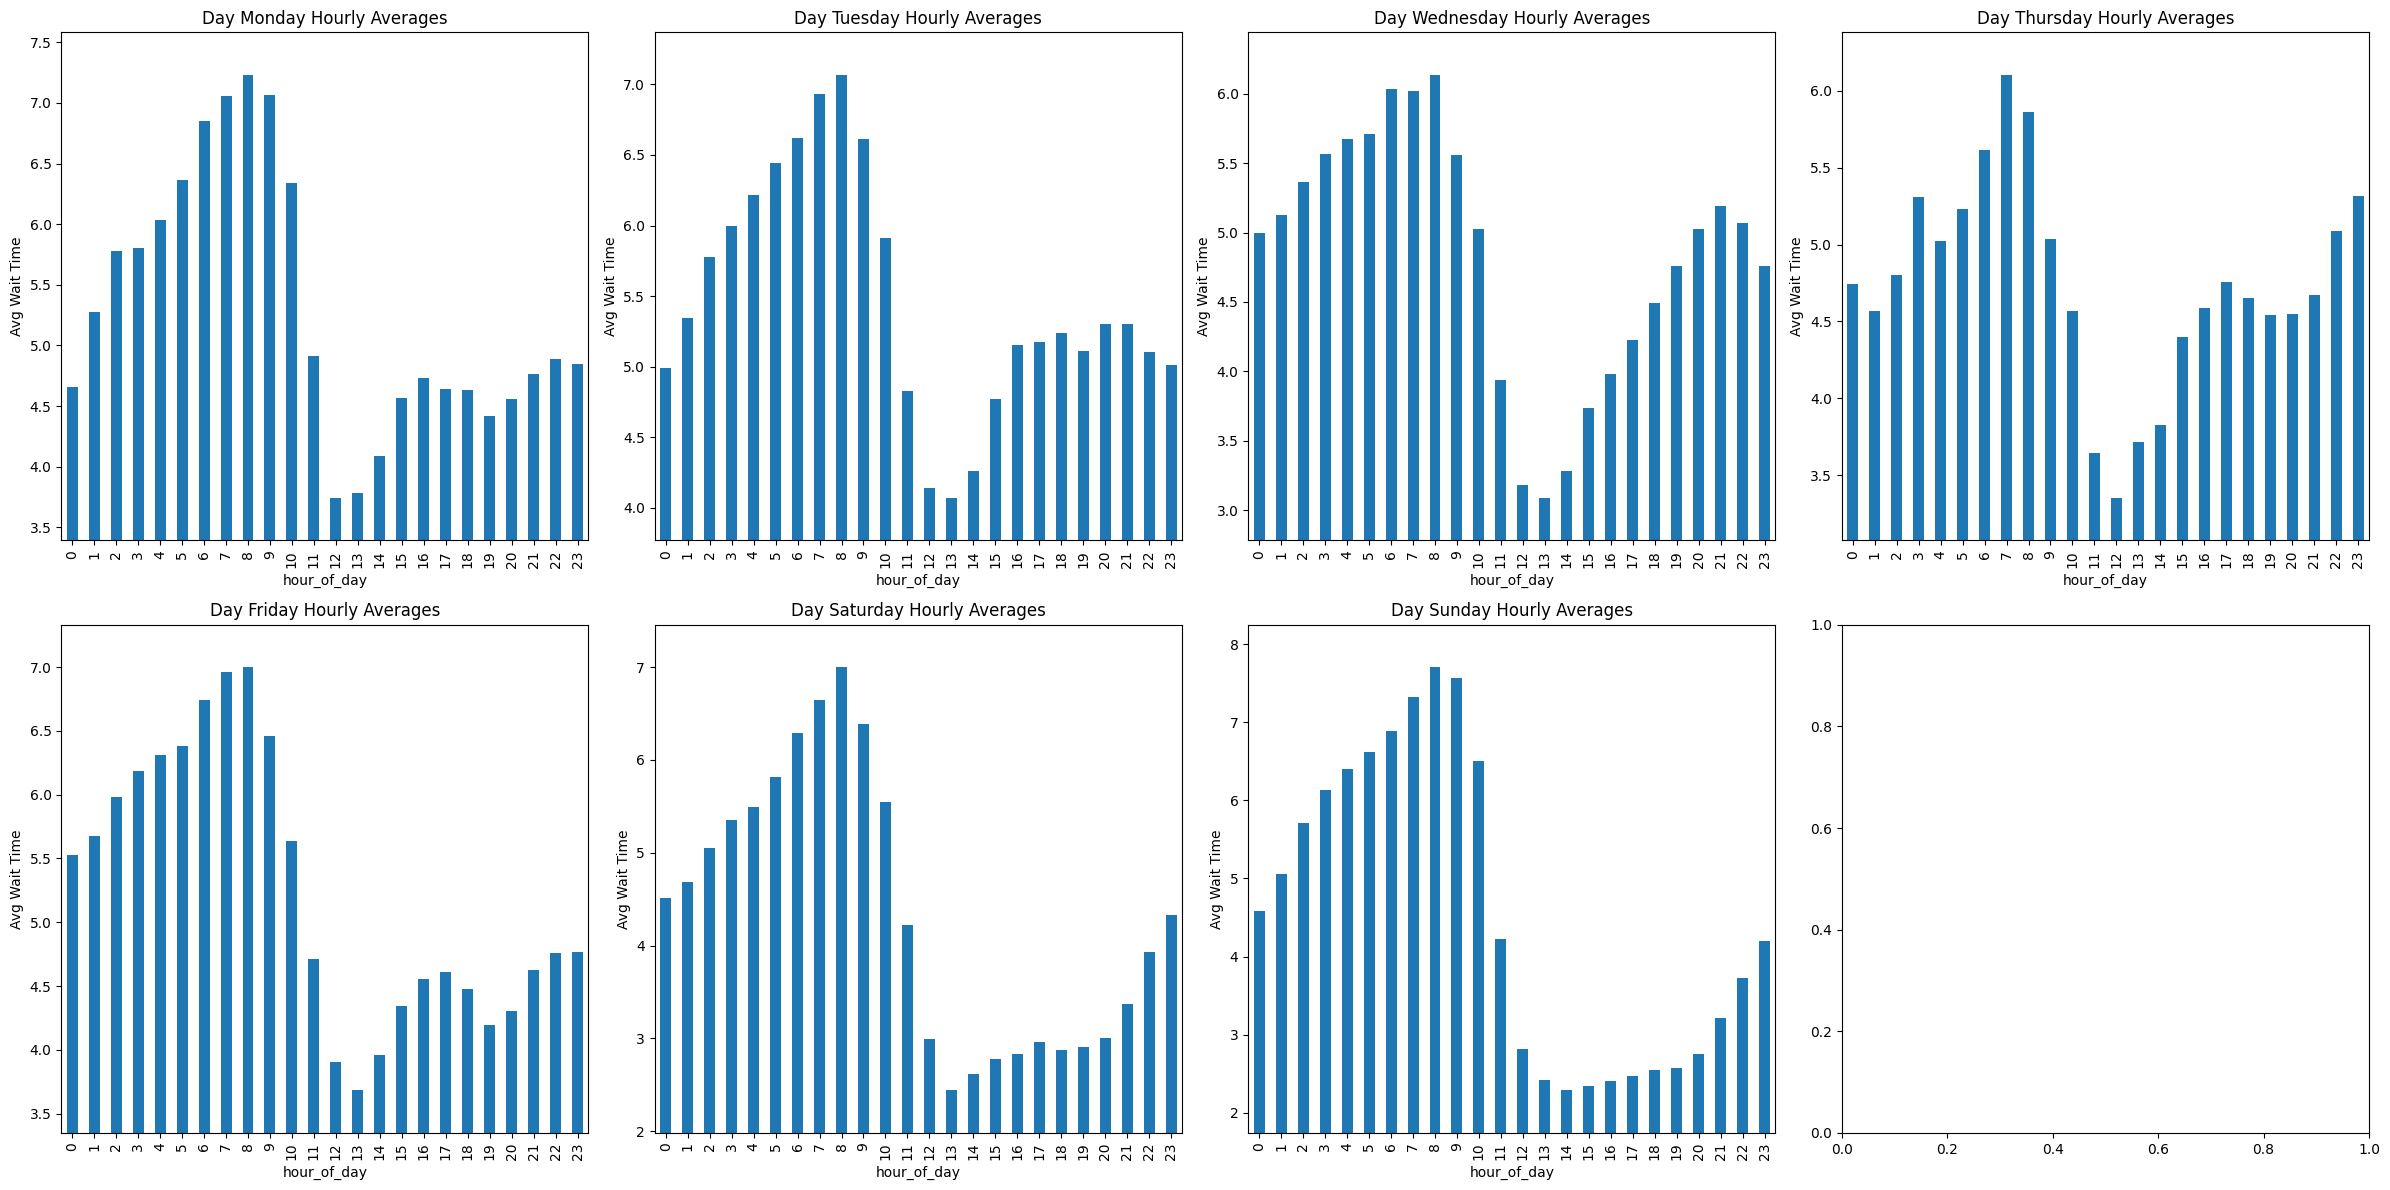

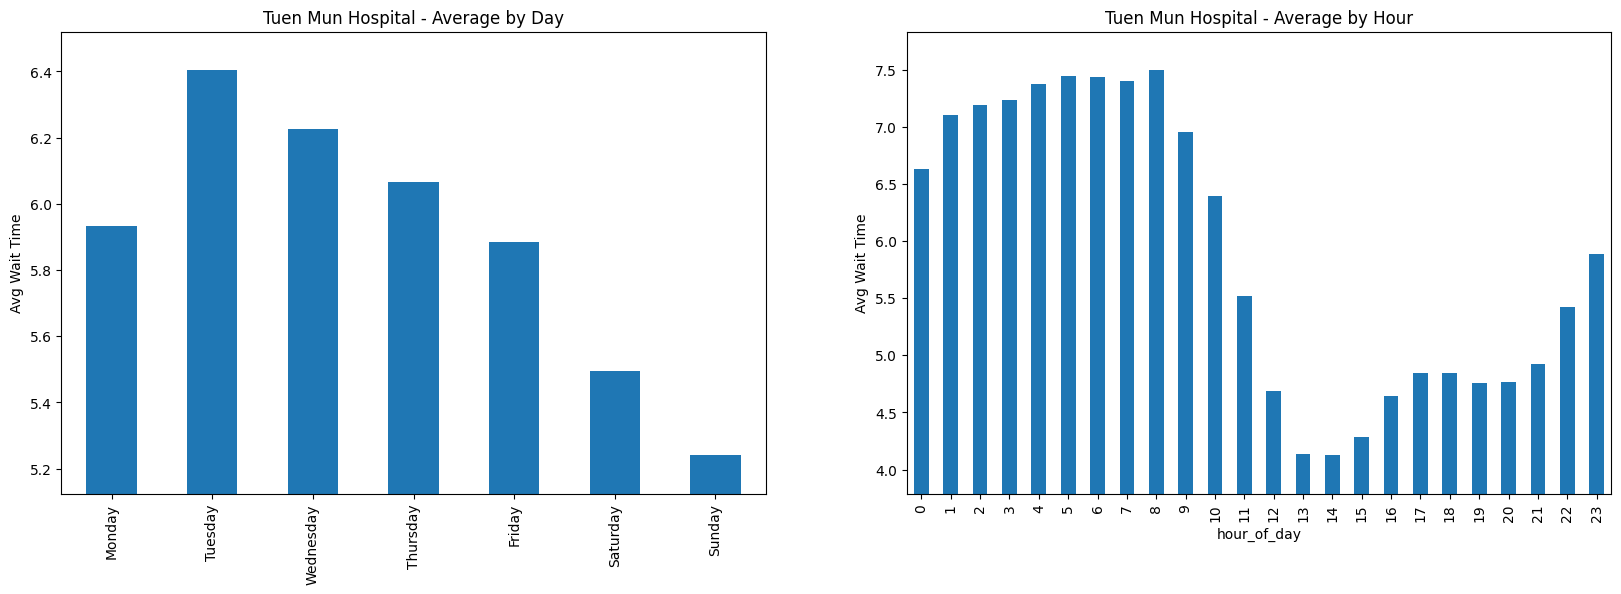

Tuen Mun Hospital - Day of Week Stats:
Most busy: Tuesday
Least busy: Sunday
Tuen Mun Hospital - Hour of Day Stats:
Most busy: 8
Least busy: 14


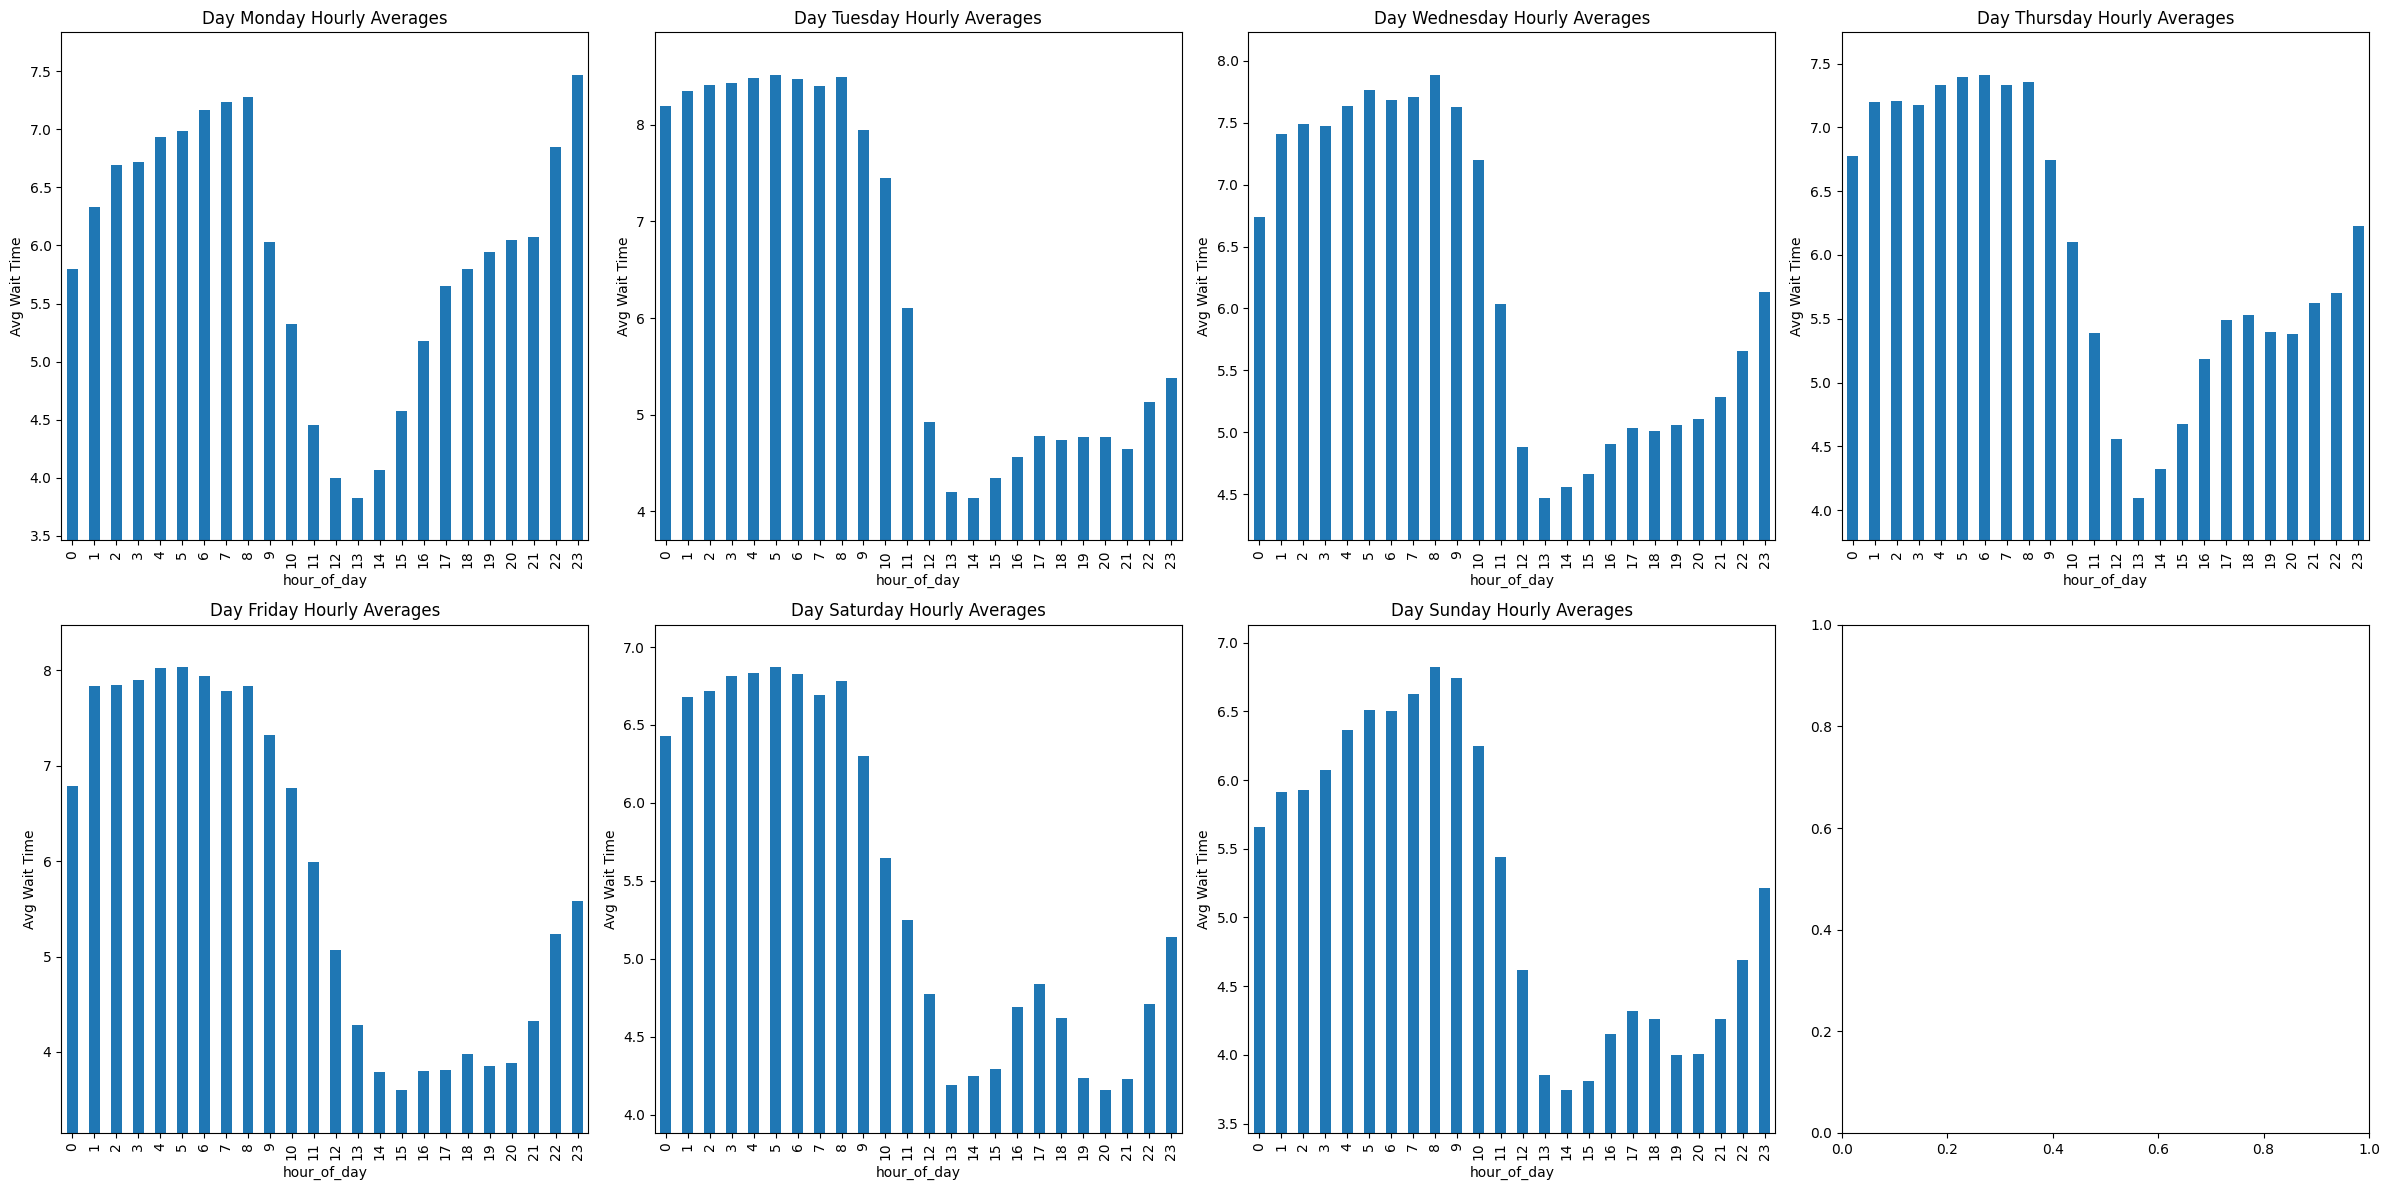

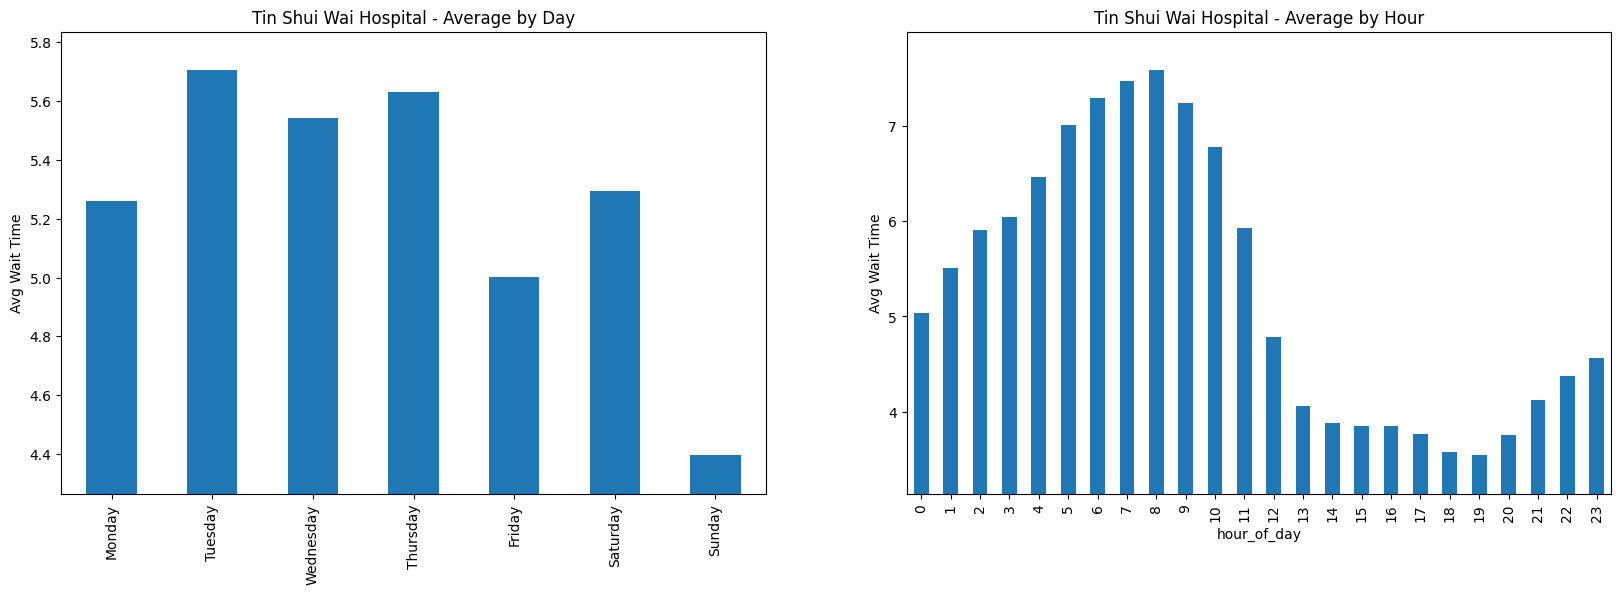

Tin Shui Wai Hospital - Day of Week Stats:
Most busy: Tuesday
Least busy: Sunday
Tin Shui Wai Hospital - Hour of Day Stats:
Most busy: 8
Least busy: 19


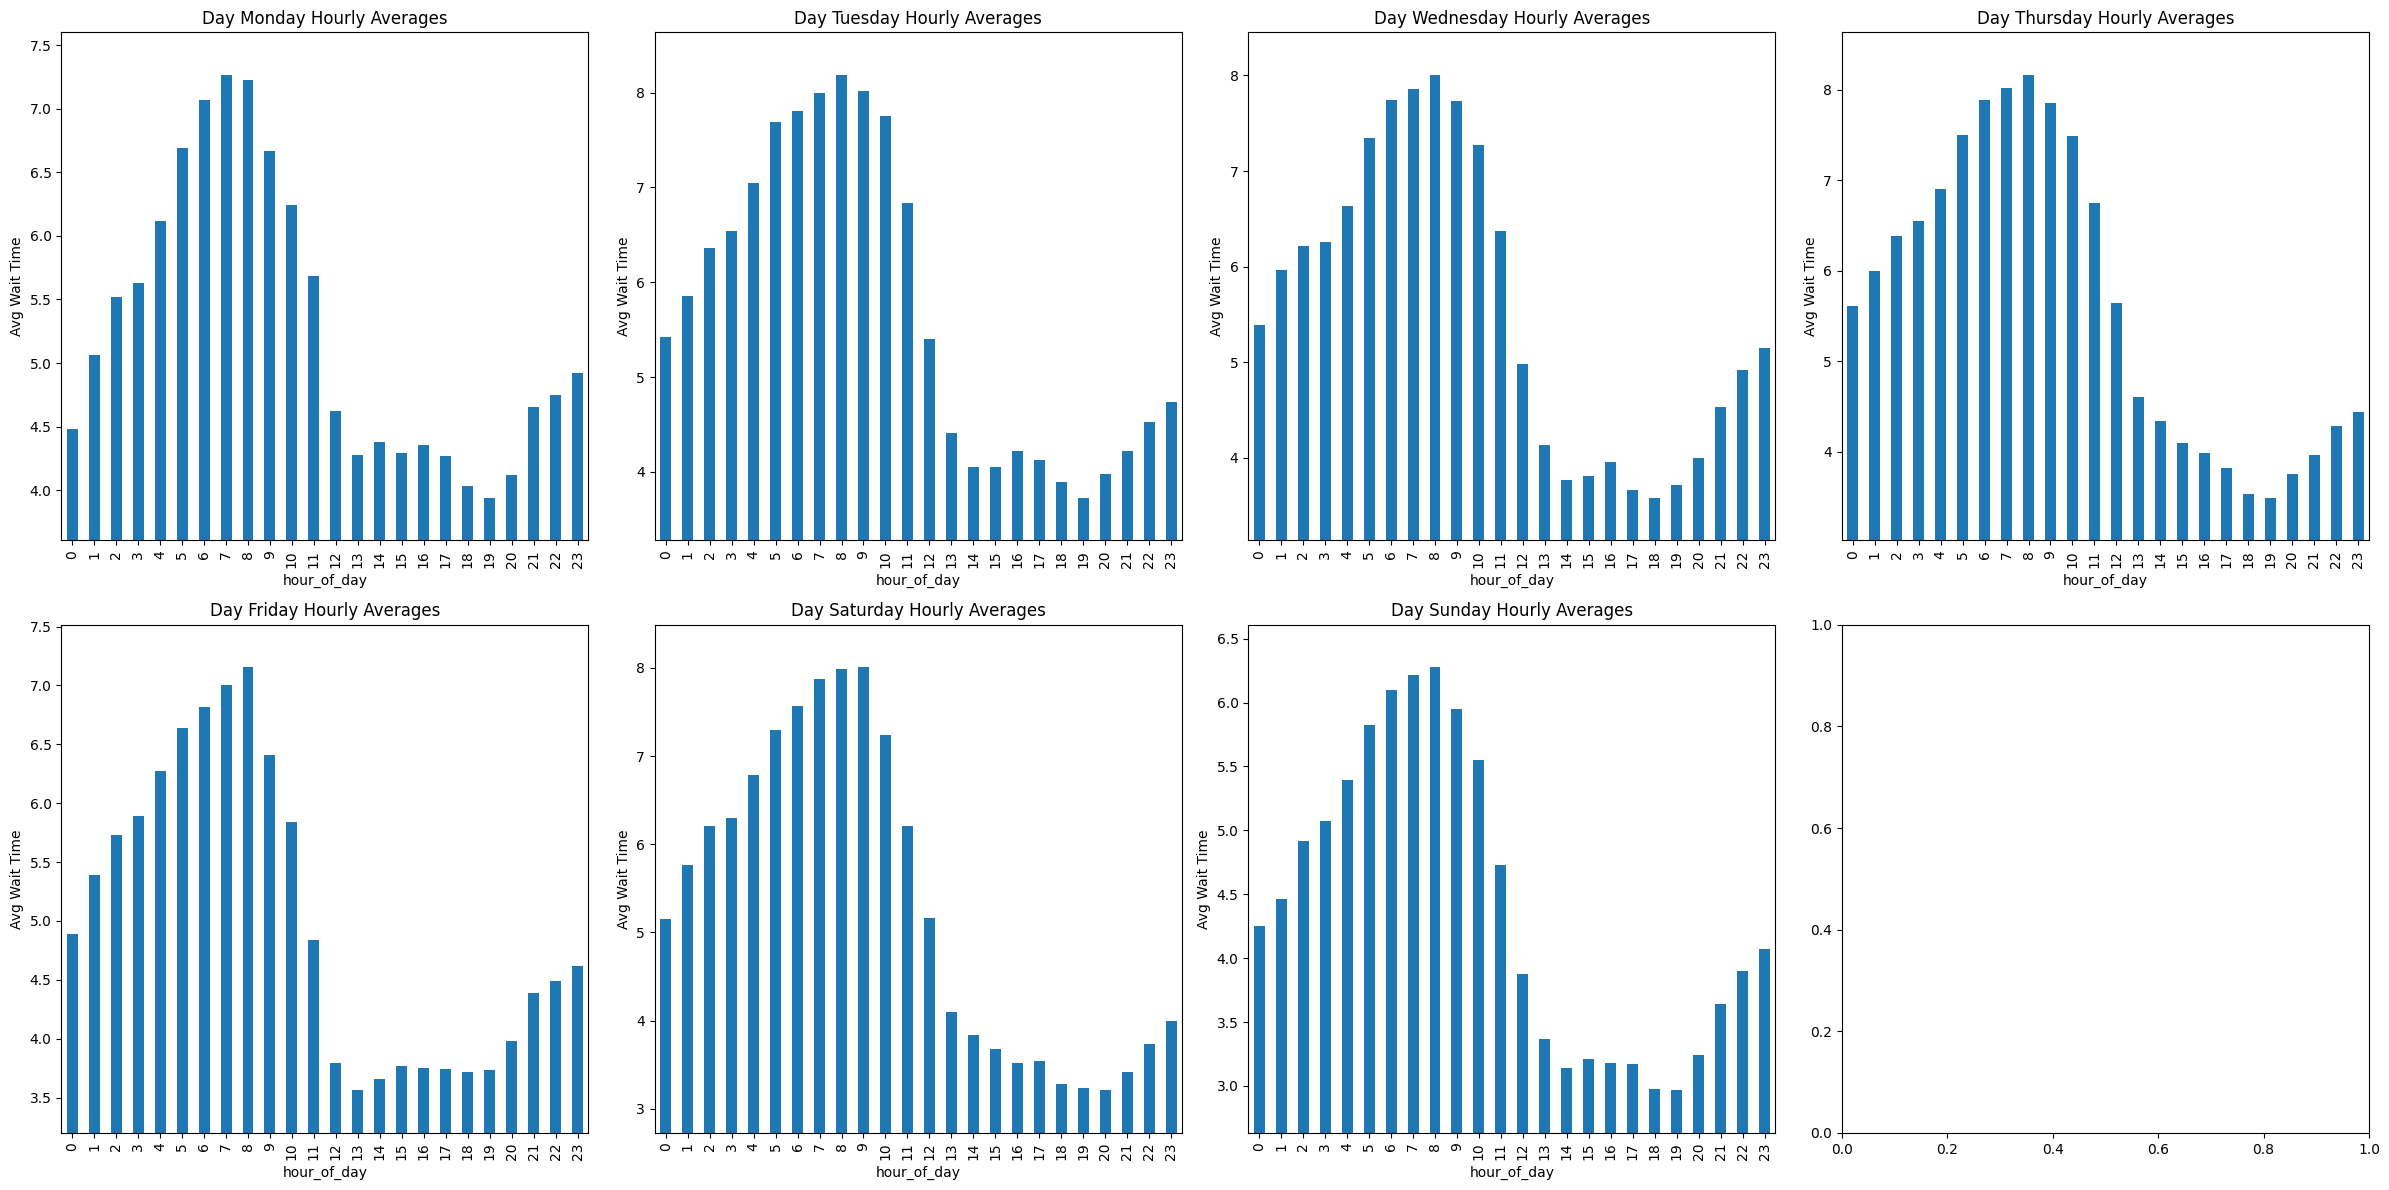

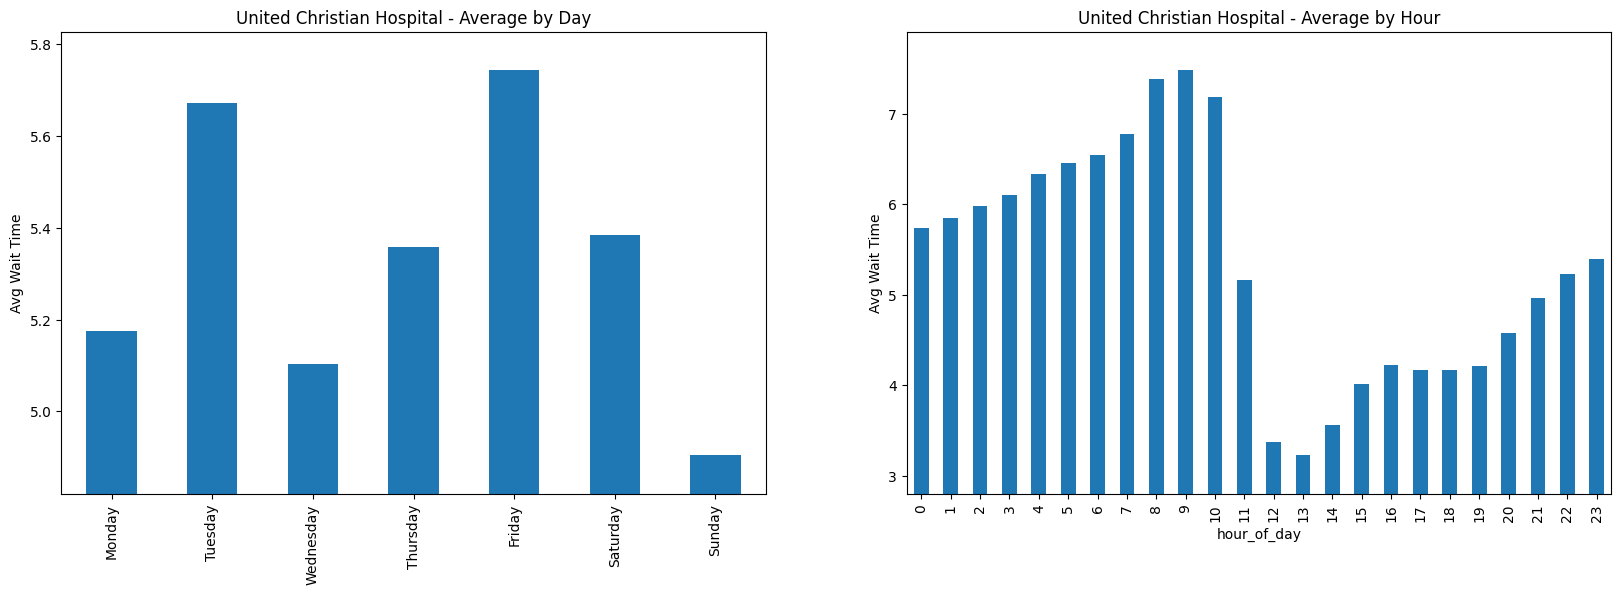

United Christian Hospital - Day of Week Stats:
Most busy: Friday
Least busy: Sunday
United Christian Hospital - Hour of Day Stats:
Most busy: 9
Least busy: 13


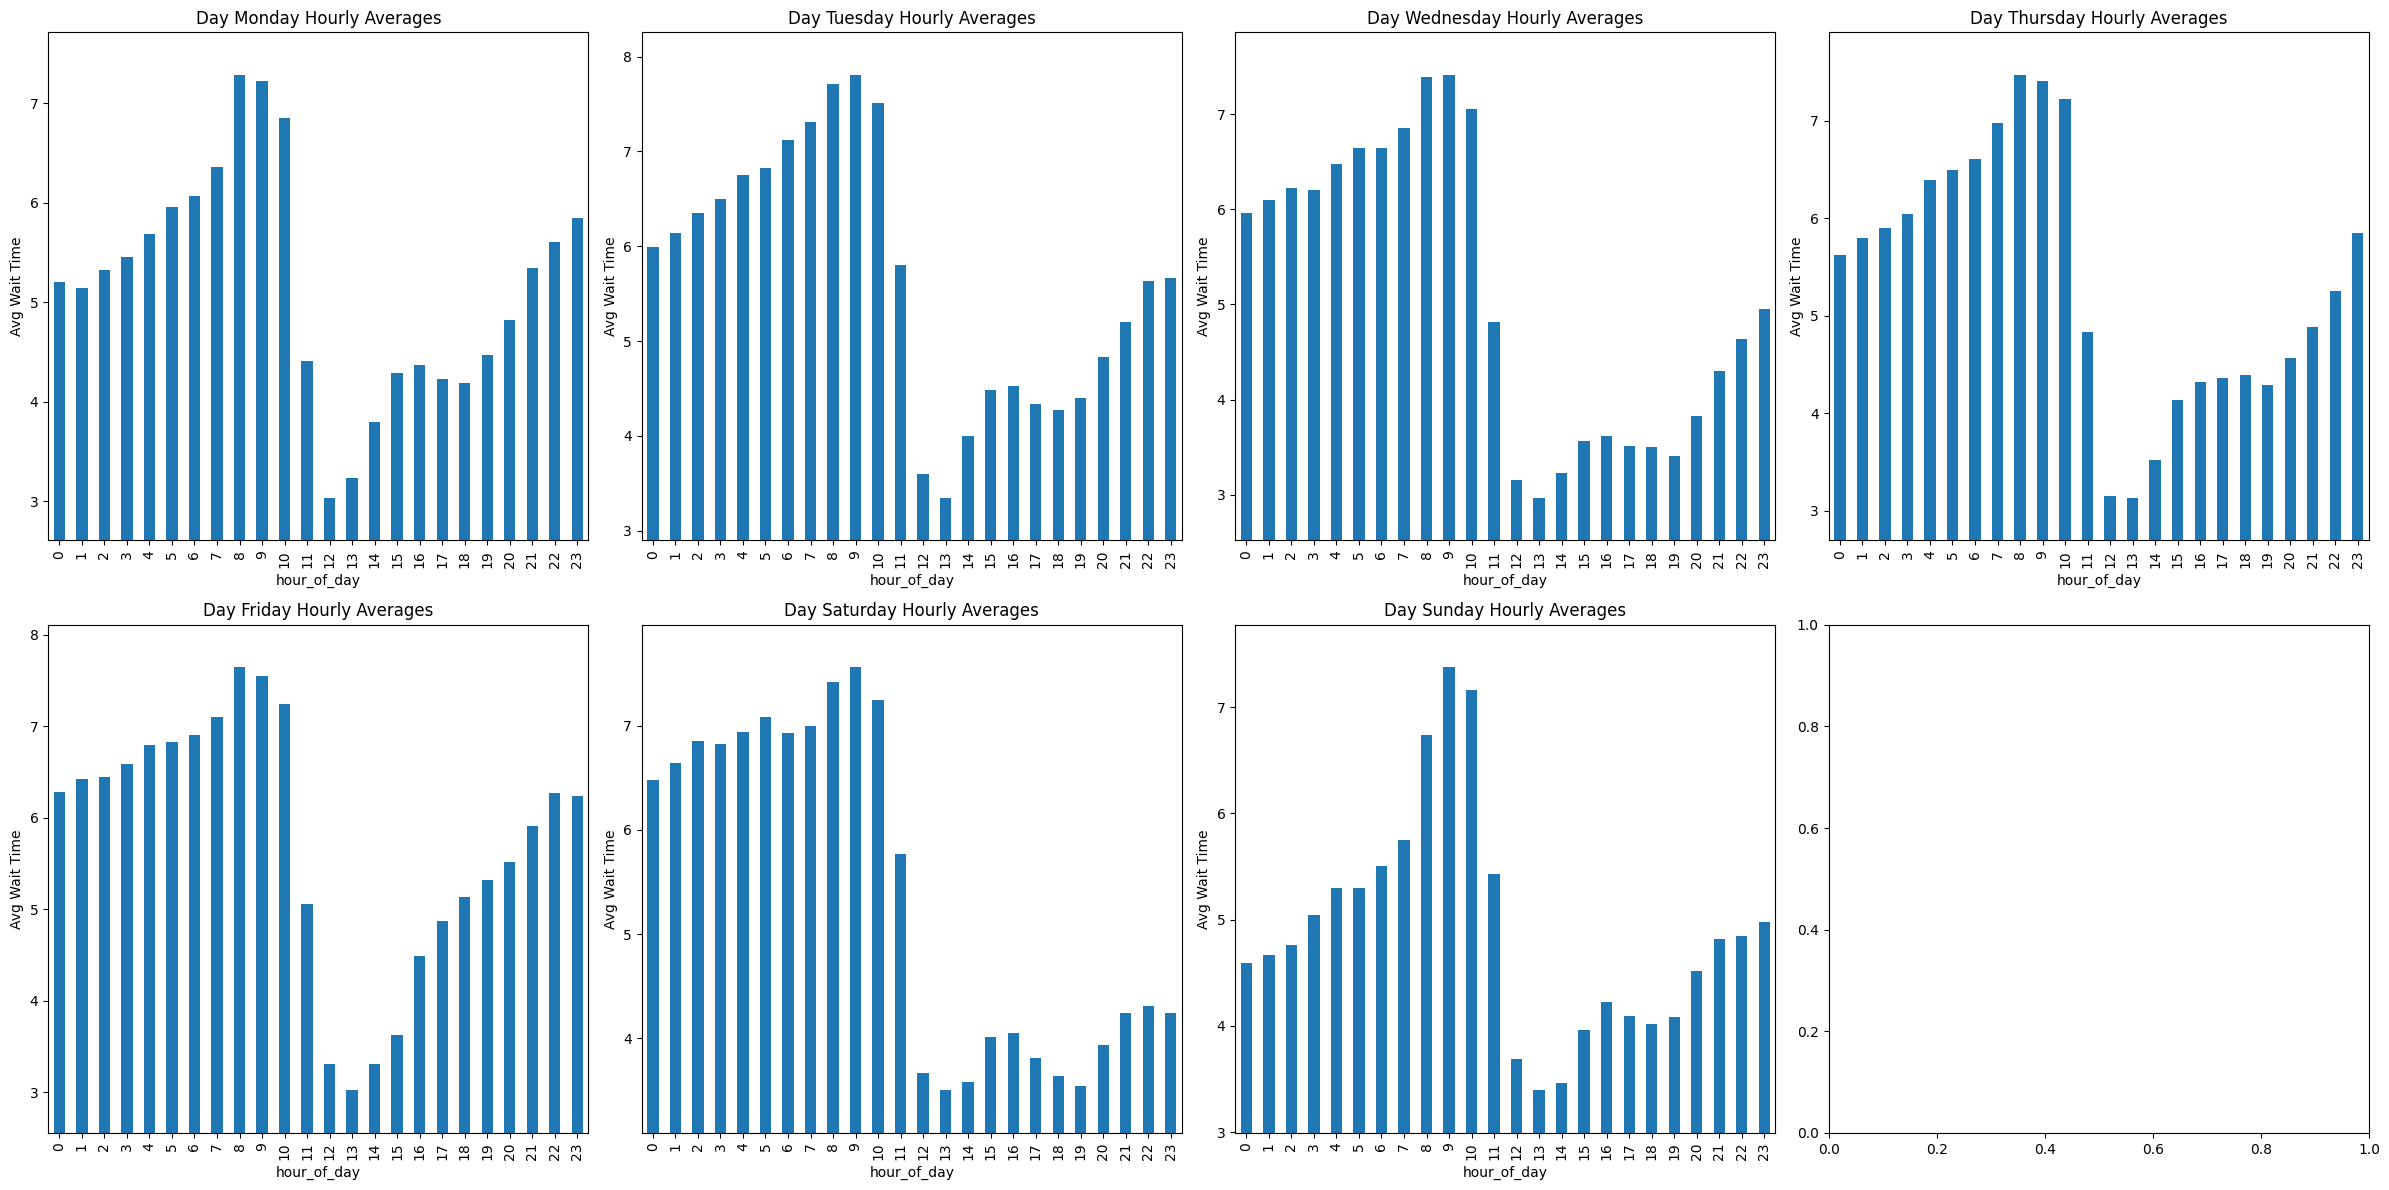

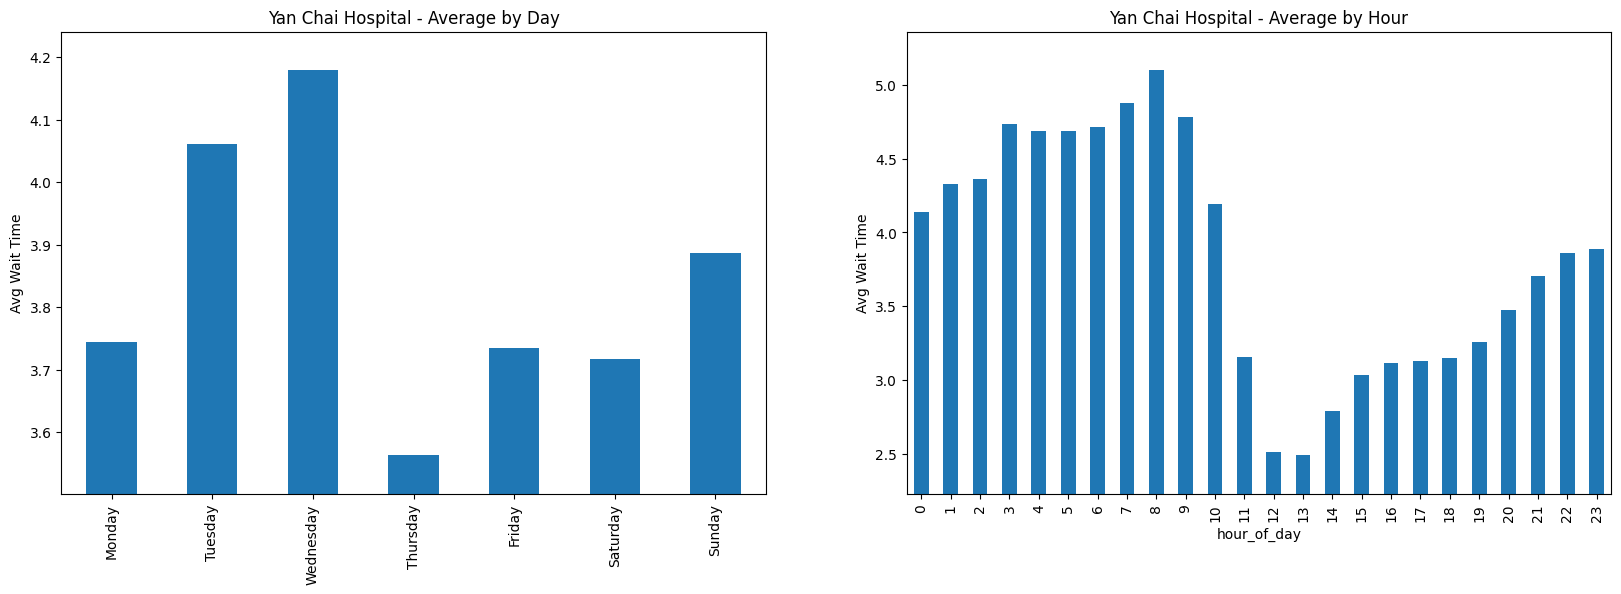

Yan Chai Hospital - Day of Week Stats:
Most busy: Wednesday
Least busy: Thursday
Yan Chai Hospital - Hour of Day Stats:
Most busy: 8
Least busy: 13


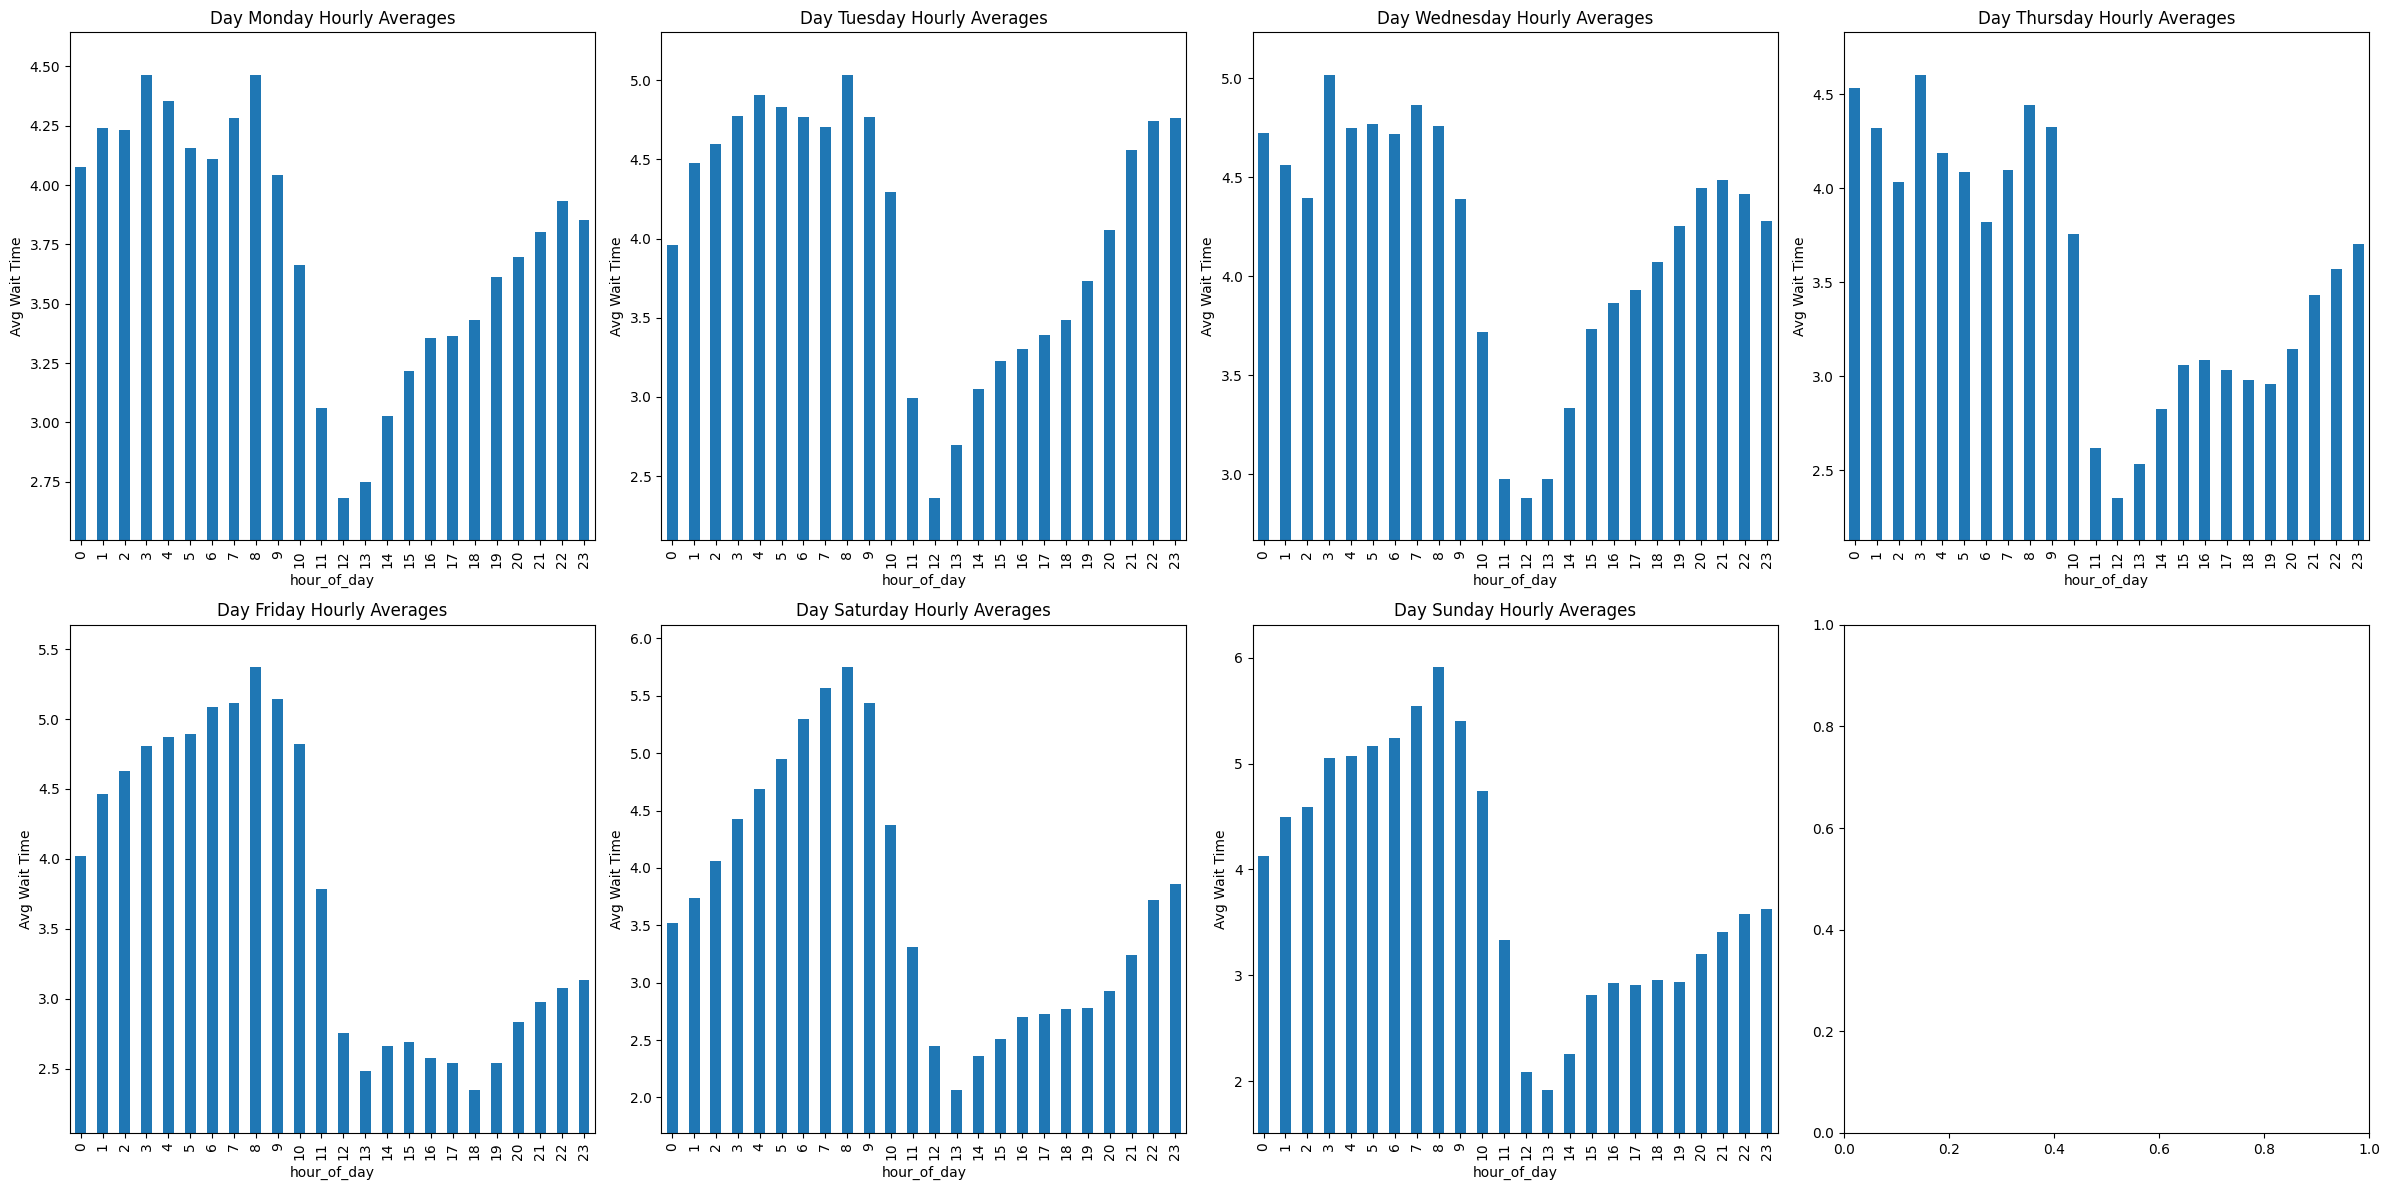

In [46]:
for hospital in df.columns[1:-2]:  # Assuming certain columns setup
    display_side_by_side_plots(df, hospital)
    average_per_day = compute_averages(df, 'day_of_week', hospital)
    # Adjust day labels
    average_per_day.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    average_per_hour = compute_averages(df, 'hour_of_day', hospital)
    print_statistics(average_per_day, f"{hospital} - Day of Week")
    print_statistics(average_per_hour, f"{hospital} - Hour of Day")
    plot_daily_hourly_averages(df, hospital)